# 2 Data Wrangling and EDA

## 2.1 Table of Contents
* [2.2 Introduction](#2.2-introduction)
* [2.3 Imports](#2.3-imports)
* [2.4 Data Collection](#2.4-data-collection)
  * [2.4.1 Data Source](#2.4.1-data-source)
  * [2.4.2 Loading the Solar Power Generation and Weather Sensor Data](#2.4.2-loading-the-solar-power-generation-and-weather-sensor-data)
* [2.5 Explore the Data](#2.5-explore-the-data)
  * [2.5.1 Initial Exploration](#.25.1-initial-exploration)
* [2.6 Proceed with Data Cleaning and Merging](#2.6-proceed-with-data-cleaning-and-merging)
  * [2.6.1 Convert 'DATE_TIME' Columns to Datetime](#2.6.1-convert-datetime-columns-to-datetime)
  * [2.6.2 Drop the Redundant Column](#2.6.2-drop-the-redundant-column)
  * [2.6.3 Merge Solar Power Generation and Weather Sensor Data](#2.6.3-merge-solar-power-generation-and-weather-sensor-data)
  * [2.6.4 Add Inverter Number Column](#2.6.4-add-inverter-number-column)
  * [2.6.5 Drop the Original SOURCE_KEY Column](#2.6.5-drop-the-original-source_key-column)
  * [2.6.6 Extract Time Components from 'DATE_TIME' Column](#2.6.6-time-components-from-date_time-columns)
* [2.7 Data Visualization](#2.7-data-visualization)
  * [2.7.1 Distribution of the Data](#2.7.1-distribution-of-the-data)
  * [2.7.2 Smooth Distribution of the Data](#2.7.2-smooth-distribution-of-the-data)
  * [2.7.3 Identify the Spread and Detect any Outliers](#2.7.3-identify-the-spread-and-detect-any-outliers)
  * [2.7.4 Relationships Between Numerical Features](#2.7.4-relationships-between-numerical-features)
  * [2.7.5 Correlations Between Numerical Features](#2.7.5-correlations-between-numerical-features)
  * [2.7.6 Focusing on Features with Strong Correlations](#2.7.6-focusing-on-features-with-strong-correlations)
  * [2.7.7 Visualize the Changes in Features over the Entire Time Period](#2.7.7-visualize-the-changes-in-features-over-the-entire-time-period)
    * [2.7.7.1 Time Trends in AC_POWER](#2.7.7.1-time-trends-in-ac_power)
    * [2.7.7.2 Time Trends in IRRADIATION](#2.7.7.2-time-trends-in-irradiation)
    * [2.7.7.3 Time Trends in MODULE_TEMPERATURE](#2.7.7.3-time-trends-in-module_temperature)

## 2.2 Introduction

Solar energy is a renewable and abundant source of energy that offers a promising alternative to fossil fuels by significantly reducing greenhouse gas emissions. Incorporating solar energy in energy production is estimated to cut carbon dioxide emissions by approximately 32%. Photovoltaic (PV) cells, which convert sunlight into electricity, are central to this process and have the advantage of generating electricity without emitting harmful pollutants. This makes solar energy a clean and environmentally friendly option, crucial for improving air quality and combating climate change.

The construction and operation of solar energy systems are influenced by various environmental factors such as solar irradiance, temperature, humidity, and wind speed. These factors' variability poses challenges for accurately predicting power production, impacting the electric grid's reliability, stability, planning, and operations. Therefore, developing accurate forecasting models for PV energy generation is essential to mitigate these challenges and ensure efficient grid operation. Even minor improvements in prediction accuracy can lead to significant cost savings, highlighting the financial benefits of enhanced forecasting models.

This project aims to predict solar energy generation with high accuracy using advanced analytical methods. The specific objectives include:

* Analyzing historical data on solar energy production and relevant weather conditions.
* Developing forecasting models using time series analysis techniques like ARIMA and SARIMA.
* Incorporating machine learning algorithms such as random forests, gradient boosting, and neural networks.
* Evaluating the models' performance using metrics like mean absolute error, mean squared error, root mean squared error, and mean absolute percentage error.
* Providing actionable insights for better management of solar energy production and storage in the electricity grid.

## 2.3 Imports

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os

%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings(action='ignore')

## 2.4 Data Collection

### 2.4.1 Data Source

The dataset used in this study is taken from the Solar Power Plant Dataset, which contains data from two separate solar power plants located in India. The data spans a period of 34 days, providing time-series information about power generation and weather conditions.

* Power Generation Data: Collected at the level of inverters, where each inverter is connected to multiple lines of solar panels. This dataset includes detailed information about the power generated by each inverter over time.

* Weather Sensor Data: Collected from a single array of weather sensors placed optimally within the plant. This dataset includes measurements of temperature and solar irradiance, which can impact solar power generation.

For each solar power plant, there are two CSV files:

* Power Generation Data File: Contains detailed information about the power generated by each inverter over time.
* Weather Sensor Data File: Contains weather-related measurements recorded over time at the plant level.

In this study, the focus will be on the data from Plant 2, specifically:

Plant_2_Generation_Data.csv
Plant_2_Weather_Sensor_Data.csv

### 2.4.2 Loading the Solar Power Generation and Weather Sensor Data

In [2]:
# Load the solar power generation data from CSV file into a Pandas DataFrame named 'generation_df'
generation_df = pd.read_csv('/Users/aysebusra/Desktop/Springboard/Capstone_3/Dataset/Solar Power Generation Data/Plant_2_Generation_Data.csv')

# Load the weather sensor data from CSV file into a Pandas DataFrame named 'weather_df'
weather_df = pd.read_csv('/Users/aysebusra/Desktop/Springboard/Capstone_3/Dataset/Solar Power Generation Data/Plant_2_Weather_Sensor_Data.csv')

## 2.5 Explore the Data

### 2.5.1 Initial Exploration

In [3]:
# Display the dimensions of the generation data
generation_df.shape

(67698, 7)

In [4]:
# Display the dimensions of the weather data
weather_df.shape

(3259, 6)

The generation data has 67,698 rows and 7 columns, the weather data has 3,259 rows and 6 columns.

In [5]:
# Display the first few rows of the generation data
generation_df.head()

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  2020-05-15 00:00:00   4136001  4UPUqMRk7TRMgml       0.0       0.0   
1  2020-05-15 00:00:00   4136001  81aHJ1q11NBPMrL       0.0       0.0   
2  2020-05-15 00:00:00   4136001  9kRcWv60rDACzjR       0.0       0.0   
3  2020-05-15 00:00:00   4136001  Et9kgGMDl729KT4       0.0       0.0   
4  2020-05-15 00:00:00   4136001  IQ2d7wF4YD8zU1Q       0.0       0.0   

   DAILY_YIELD   TOTAL_YIELD  
0  9425.000000  2.429011e+06  
1     0.000000  1.215279e+09  
2  3075.333333  2.247720e+09  
3   269.933333  1.704250e+06  
4  3177.000000  1.994153e+07

The generation data has the following columns: 'DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD'. All rows shown have zero DC_POWER and AC_POWER, indicating nighttime or no power generation at those times. 

Columns description of the generation data:

* DATE_TIME: This column records the timestamp of the data entry, indicating the exact date and time when the measurement was taken.
* PLANT_ID: This is an identifier for the solar power plant.
* SOURCE_KEY: This column contains a unique identifier for the source of the data, which in this case, is the inverter. Each inverter has its own unique SOURCE_KEY.
* DC_POWER: Direct Current (DC) power generated by the inverter at the given timestamp. It is measured in kilowatts (kW).
* AC_POWER: Alternating Current (AC) power generated by the inverter at the given timestamp. This is the power after it has been converted from DC by the inverter, also measured in kilowatts (kW).
* DAILY_YIELD: The amount of energy produced by the inverter on that particular day up to the given timestamp. It is measured in kilowatt-hours (kWh).
* TOTAL_YIELD: The cumulative total energy produced by the inverter since it started operating, up to the given timestamp. It is also measured in kilowatt-hours (kWh).

In [6]:
# Display the first few rows of the weather data
weather_df.head()

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4136001  iq8k7ZNt4Mwm3w0            27.004764   
1  2020-05-15 00:15:00   4136001  iq8k7ZNt4Mwm3w0            26.880811   
2  2020-05-15 00:30:00   4136001  iq8k7ZNt4Mwm3w0            26.682055   
3  2020-05-15 00:45:00   4136001  iq8k7ZNt4Mwm3w0            26.500589   
4  2020-05-15 01:00:00   4136001  iq8k7ZNt4Mwm3w0            26.596148   

   MODULE_TEMPERATURE  IRRADIATION  
0           25.060789          0.0  
1           24.421869          0.0  
2           24.427290          0.0  
3           24.420678          0.0  
4           25.088210          0.0

The weather data has  the folowing columns:'DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', and 'IRRADIATION'. All rows shown have IRRADIATION values of 0.0, indicating nighttime or no solar irradiance at those times.

Column description of the weather data:

* AMBIENT_TEMPERATURE: The temperature of the air surrounding the solar panels at the given timestamp, measured in degrees Celsius (°C).
* MODULE_TEMPERATURE: The temperature of the solar panels themselves at the given timestamp, measured in degrees Celsius (°C).
* IRRADIATION: The amount of solar irradiance hitting the surface of the solar panels at the given timestamp, measured in kilowatts per square meter (kW/m²).

In [7]:
# Get an overview of the structure and characteristics of the generation data
generation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAILY_YIELD  67698 non-null  float64
 6   TOTAL_YIELD  67698 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.6+ MB


All columns in the generation_df data have non-null values with a data types object for 'DATE_TIME' and 'SOURCE_KEY', int64 for 'PLANT_ID', and float for 'DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD'.

In [8]:
# Get an overview of the structure and characteristics of the weather data
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   PLANT_ID             3259 non-null   int64  
 2   SOURCE_KEY           3259 non-null   object 
 3   AMBIENT_TEMPERATURE  3259 non-null   float64
 4   MODULE_TEMPERATURE   3259 non-null   float64
 5   IRRADIATION          3259 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 152.9+ KB


All columns in the weather_df data have non-null values with a data types object for 'DATE_TIME' and 'SOURCE_KEY', int64 for 'PLANT_ID', and float64 for 'TEMPERATURE' and 'IRRADIATION'.

In [9]:
# Generate statistical information for numerical column in the generation data
generation_df.describe()

PLANT_ID      DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD
count    67698.0  67698.000000  67698.000000  67698.000000  6.769800e+04
mean   4136001.0    246.701961    241.277825   3294.890295  6.589448e+08
std          0.0    370.569597    362.112118   2919.448386  7.296678e+08
min    4136001.0      0.000000      0.000000      0.000000  0.000000e+00
25%    4136001.0      0.000000      0.000000    272.750000  1.996494e+07
50%    4136001.0      0.000000      0.000000   2911.000000  2.826276e+08
75%    4136001.0    446.591667    438.215000   5534.000000  1.348495e+09
max    4136001.0   1420.933333   1385.420000   9873.000000  2.247916e+09

For the generation data:

* The 'DC_POWER' and 'AC_POWER' columns have mean values of approximately 246.7 kW and 241.3 kW, respectively, with high variability as indicated by standard deviations around 370 kW.
* The 'DAILY_YIELD' shows an average of 3,294.9 kWh, reaching a maximum of 9,873 kWh.
* The 'TOTAL_YIELD' represents the cumulative total energy production, displaying substantial values up to approximately 2.25 billion kWh.

In [10]:
# Generate statistical information for numerical column in the weather data
weather_df.describe()

PLANT_ID  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
count     3259.0          3259.000000         3259.000000  3259.000000
mean   4136001.0            28.069400           32.772408     0.232737
std          0.0             4.061556           11.344034     0.312693
min    4136001.0            20.942385           20.265123     0.000000
25%    4136001.0            24.602135           23.716881     0.000000
50%    4136001.0            26.981263           27.534606     0.019040
75%    4136001.0            31.056757           40.480653     0.438717
max    4136001.0            39.181638           66.635953     1.098766

For the weather data:

* The 'AMBIENT_TEMPERATURE' has a mean of 28.07°C, ranging from 20.94°C to 39.18°C.
* The 'MODULE_TEMPERATURE' averages 32.77°C, with a range from 20.27°C to 66.64°C.
* The 'IRRADIATION' has a mean of 0.233 kW/m², with values reaching up to a maximum of 1.099 kW/m².

In [11]:
# Check for any missing values in the generation data
generation_df.isnull().sum()

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

In [12]:
# Check for any missing values in the weather data
weather_df.isnull().sum()

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

All columns in the generation and weather data have non-null values.

In [13]:
# Check the number of unique PLANT_ID values in the generation data
num_unique_plants_gen = generation_df['PLANT_ID'].nunique()

# Check the number of unique PLANT_ID values in the weather data
num_unique_plants_weather = weather_df['PLANT_ID'].nunique()

print(f"Number of unique PLANT_ID values in generation data: {num_unique_plants_gen}")
print(f"Number of unique PLANT_ID values in weather data: {num_unique_plants_weather}")

Number of unique PLANT_ID values in generation data: 1
Number of unique PLANT_ID values in weather data: 1


Both the generation and weather data contain only one unique PLANT_ID value, confirming that the data pertains to a Plant 2.

In [14]:
# Check the number of unique SOURCE_KEY values in the generation data
num_unique_source_keys_gen = generation_df['SOURCE_KEY'].nunique()

# Check the number of unique SOURCE_KEY values in the weather data
num_unique_source_keys_weather = weather_df['SOURCE_KEY'].nunique()

print(f"Number of unique SOURCE_KEY values in generation data: {num_unique_source_keys_gen}")
print(f"Number of unique SOURCE_KEY values in weather data: {num_unique_source_keys_weather}")

Number of unique SOURCE_KEY values in generation data: 22
Number of unique SOURCE_KEY values in weather data: 1


The generation data is collected from 22 different inverters, while the weather data is collected from a single weather sensor array.

In [15]:
# Check the value counts for PLANT_ID and SOURCE_KEY in the generation data
print(generation_df['PLANT_ID'].value_counts())
print('\n')
print(generation_df['SOURCE_KEY'].value_counts())

PLANT_ID
4136001    67698
Name: count, dtype: int64


SOURCE_KEY
xoJJ8DcxJEcupym    3259
WcxssY2VbP4hApt    3259
9kRcWv60rDACzjR    3259
vOuJvMaM2sgwLmb    3259
rrq4fwE8jgrTyWY    3259
LYwnQax7tkwH5Cb    3259
LlT2YUhhzqhg5Sw    3259
q49J1IKaHRwDQnt    3259
oZZkBaNadn6DNKz    3259
PeE6FRyGXUgsRhN    3259
81aHJ1q11NBPMrL    3259
V94E5Ben1TlhnDV    3259
oZ35aAeoifZaQzV    3195
4UPUqMRk7TRMgml    3195
Qf4GUc1pJu5T6c6    3195
Mx2yZCDsyf6DPfv    3195
Et9kgGMDl729KT4    3195
Quc1TzYxW2pYoWX    3195
mqwcsP2rE7J0TFp    2355
NgDl19wMapZy17u    2355
IQ2d7wF4YD8zU1Q    2355
xMbIugepa2P7lBB    2355
Name: count, dtype: int64


In [16]:
# Check the value counts for PLANT_ID and SOURCE_KEY in the weather data
print(weather_df['PLANT_ID'].value_counts())
print('\n')
print(weather_df['SOURCE_KEY'].value_counts())

PLANT_ID
4136001    3259
Name: count, dtype: int64


SOURCE_KEY
iq8k7ZNt4Mwm3w0    3259
Name: count, dtype: int64


* The PLANT _ID' is the same (4136001) for all entries in both the generation and weather data, indicating that all data points are from Plant 2. This column is redundant and can be dropped.
* The SOURCE KEY' in the generation data shows multiple unique values, each with several entries. This column is essential for identifying different inverters and should be retained.
* The SOURCE KEY' in the weather data has only one unique value (iq8k7ZNt4Mwm3w0), indicating a single array of sensors.

In [17]:
# Check for duplicate rows in the generation data
duplicates_gen = generation_df.duplicated().sum()
print(f"Number of duplicate rows in generation data: {duplicates_gen}")

# Check for duplicate rows in the weather data
duplicates_weather = weather_df.duplicated().sum()
print(f"Number of duplicate rows in weather data: {duplicates_weather}")

Number of duplicate rows in generation data: 0
Number of duplicate rows in weather data: 0


## 2.6 Proceed with Data Cleaning and Merging

### 2.6.1 Convert 'DATE_TIME' Columns to Datetime

'DATE_TIME' column in the generation and weather data is currently stored as an object data type, which typically indicates that it's being treated as a string. it's beneficial to convert the 'DATE_TIME' column to a datetime data type.

In [18]:
# Convert 'DATE_TIME' columns to Datetime in the generation data
generation_df['DATE_TIME'] = pd.to_datetime(generation_df['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')
generation_df.dtypes

DATE_TIME      datetime64[ns]
PLANT_ID                int64
SOURCE_KEY             object
DC_POWER              float64
AC_POWER              float64
DAILY_YIELD           float64
TOTAL_YIELD           float64
dtype: object

In [19]:
# Convert 'DATE_TIME' columns to Datetime in the weather data
weather_df['DATE_TIME'] = pd.to_datetime(weather_df['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')
weather_df.dtypes

DATE_TIME              datetime64[ns]
PLANT_ID                        int64
SOURCE_KEY                     object
AMBIENT_TEMPERATURE           float64
MODULE_TEMPERATURE            float64
IRRADIATION                   float64
dtype: object

### 2.6.2 Drop the Redundant Column

'PLANT_ID' in the generation data and both 'PLANT_ID' and 'SOURCE_KEY' in the weather data have unique values, indicating that all data points belong to the same plant. Therefore, it can be dropped as it is redundant.

In [20]:
# Drop the 'PLANT_ID' column in the generation data
generation_df.drop(columns=['PLANT_ID'], axis=1, inplace=True)
generation_df.head()

DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD   TOTAL_YIELD
0 2020-05-15  4UPUqMRk7TRMgml       0.0       0.0  9425.000000  2.429011e+06
1 2020-05-15  81aHJ1q11NBPMrL       0.0       0.0     0.000000  1.215279e+09
2 2020-05-15  9kRcWv60rDACzjR       0.0       0.0  3075.333333  2.247720e+09
3 2020-05-15  Et9kgGMDl729KT4       0.0       0.0   269.933333  1.704250e+06
4 2020-05-15  IQ2d7wF4YD8zU1Q       0.0       0.0  3177.000000  1.994153e+07

In [21]:
# Drop the 'PLANT_ID' and 'SOURCE_KEY' columns in the weather data
weather_df.drop(columns=['PLANT_ID', 'SOURCE_KEY'], axis=1, inplace=True)
weather_df.head()

DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
0 2020-05-15 00:00:00            27.004764           25.060789          0.0
1 2020-05-15 00:15:00            26.880811           24.421869          0.0
2 2020-05-15 00:30:00            26.682055           24.427290          0.0
3 2020-05-15 00:45:00            26.500589           24.420678          0.0
4 2020-05-15 01:00:00            26.596148           25.088210          0.0

### 2.6.3 Merge Solar Power Generation and Weather Sensor Data

In [22]:
# Merge the generation and weather data on 'DATE_TIME'
merged_df = pd.merge(generation_df, weather_df, on='DATE_TIME')
merged_df.head()

DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD   TOTAL_YIELD  \
0 2020-05-15  4UPUqMRk7TRMgml       0.0       0.0  9425.000000  2.429011e+06   
1 2020-05-15  81aHJ1q11NBPMrL       0.0       0.0     0.000000  1.215279e+09   
2 2020-05-15  9kRcWv60rDACzjR       0.0       0.0  3075.333333  2.247720e+09   
3 2020-05-15  Et9kgGMDl729KT4       0.0       0.0   269.933333  1.704250e+06   
4 2020-05-15  IQ2d7wF4YD8zU1Q       0.0       0.0  3177.000000  1.994153e+07   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  
0            27.004764           25.060789          0.0  
1            27.004764           25.060789          0.0  
2            27.004764           25.060789          0.0  
3            27.004764           25.060789          0.0  
4            27.004764           25.060789          0.0

### 2.6.4 Add Inverter Number Column

Complex 'SOURCE_KEY' values is replaced with simpler numerical identifiers named 'INVERTER' for easier analysis and visualization.

In [23]:
# Extracts all unique 'SOURCE_KEY' values from the generation_df data
unique_inverters = generation_df['SOURCE_KEY'].unique()

# Creates a dictionary where each 'SOURCE_KEY' is mapped to a unique numerical identifier
inverter_mapping = {source_key: i+1 for i, source_key in enumerate(unique_inverters)}

# Apply the mapping to the 'SOURCE_KEY' column and create a new 'INVERTER' column
merged_df['INVERTER'] = generation_df['SOURCE_KEY'].map(inverter_mapping)

In [24]:
merged_df.head()

DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD   TOTAL_YIELD  \
0 2020-05-15  4UPUqMRk7TRMgml       0.0       0.0  9425.000000  2.429011e+06   
1 2020-05-15  81aHJ1q11NBPMrL       0.0       0.0     0.000000  1.215279e+09   
2 2020-05-15  9kRcWv60rDACzjR       0.0       0.0  3075.333333  2.247720e+09   
3 2020-05-15  Et9kgGMDl729KT4       0.0       0.0   269.933333  1.704250e+06   
4 2020-05-15  IQ2d7wF4YD8zU1Q       0.0       0.0  3177.000000  1.994153e+07   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  INVERTER  
0            27.004764           25.060789          0.0         1  
1            27.004764           25.060789          0.0         2  
2            27.004764           25.060789          0.0         3  
3            27.004764           25.060789          0.0         4  
4            27.004764           25.060789          0.0         5

### 2.6.5 Drop the original 'SOURCE_KEY' column

In [25]:
# Drop the original 'SOURCE_KEY' column after replacing with inverter number
merged_df.drop(columns=['SOURCE_KEY'], axis=1, inplace=True)
merged_df.head()

DATE_TIME  DC_POWER  AC_POWER  DAILY_YIELD   TOTAL_YIELD  \
0 2020-05-15       0.0       0.0  9425.000000  2.429011e+06   
1 2020-05-15       0.0       0.0     0.000000  1.215279e+09   
2 2020-05-15       0.0       0.0  3075.333333  2.247720e+09   
3 2020-05-15       0.0       0.0   269.933333  1.704250e+06   
4 2020-05-15       0.0       0.0  3177.000000  1.994153e+07   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  INVERTER  
0            27.004764           25.060789          0.0         1  
1            27.004764           25.060789          0.0         2  
2            27.004764           25.060789          0.0         3  
3            27.004764           25.060789          0.0         4  
4            27.004764           25.060789          0.0         5

In [26]:
# Reorder the columns and reset the index
merged_df = merged_df[['DATE_TIME', 'INVERTER', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']]
merged_df.reset_index(drop=True, inplace=True)
merged_df.head()

DATE_TIME  INVERTER  DC_POWER  AC_POWER  DAILY_YIELD   TOTAL_YIELD  \
0 2020-05-15         1       0.0       0.0  9425.000000  2.429011e+06   
1 2020-05-15         2       0.0       0.0     0.000000  1.215279e+09   
2 2020-05-15         3       0.0       0.0  3075.333333  2.247720e+09   
3 2020-05-15         4       0.0       0.0   269.933333  1.704250e+06   
4 2020-05-15         5       0.0       0.0  3177.000000  1.994153e+07   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  
0            27.004764           25.060789          0.0  
1            27.004764           25.060789          0.0  
2            27.004764           25.060789          0.0  
3            27.004764           25.060789          0.0  
4            27.004764           25.060789          0.0

### 2.6.6 Extract Time Components from 'DATE_TIME' Column

In [27]:
# Extract date, time, day, month, week, hours, and minutes components from 'DATE_TIME' column
merged_df["DATE"] = merged_df["DATE_TIME"].dt.date
merged_df["TIME"] = merged_df["DATE_TIME"].dt.time
merged_df['DAY'] = merged_df['DATE_TIME'].dt.day
merged_df['MONTH'] = merged_df['DATE_TIME'].dt.month
merged_df['WEEK'] = merged_df['DATE_TIME'].dt.isocalendar().week
merged_df['HOURS'] = merged_df['DATE_TIME'].dt.hour
merged_df['MINUTES'] = merged_df['DATE_TIME'].dt.minute

In [28]:
merged_df.head()

DATE_TIME  INVERTER  DC_POWER  AC_POWER  DAILY_YIELD   TOTAL_YIELD  \
0 2020-05-15         1       0.0       0.0  9425.000000  2.429011e+06   
1 2020-05-15         2       0.0       0.0     0.000000  1.215279e+09   
2 2020-05-15         3       0.0       0.0  3075.333333  2.247720e+09   
3 2020-05-15         4       0.0       0.0   269.933333  1.704250e+06   
4 2020-05-15         5       0.0       0.0  3177.000000  1.994153e+07   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION        DATE      TIME  \
0            27.004764           25.060789          0.0  2020-05-15  00:00:00   
1            27.004764           25.060789          0.0  2020-05-15  00:00:00   
2            27.004764           25.060789          0.0  2020-05-15  00:00:00   
3            27.004764           25.060789          0.0  2020-05-15  00:00:00   
4            27.004764           25.060789          0.0  2020-05-15  00:00:00   

   DAY  MONTH  WEEK  HOURS  MINUTES  
0   15      5    20      0        0  
1   15      5    20      0        0  
2   15      5    20      0        0  
3   15      5    20      0        0  
4   15      5    20      0        0

In [29]:
merged_df.dtypes

DATE_TIME              datetime64[ns]
INVERTER                        int64
DC_POWER                      float64
AC_POWER                      float64
DAILY_YIELD                   float64
TOTAL_YIELD                   float64
AMBIENT_TEMPERATURE           float64
MODULE_TEMPERATURE            float64
IRRADIATION                   float64
DATE                           object
TIME                           object
DAY                             int32
MONTH                           int32
WEEK                           UInt32
HOURS                           int32
MINUTES                         int32
dtype: object

In [30]:
# Check for any remaining missing values in the merged data
merged_df.isnull().sum()

DATE_TIME              0
INVERTER               0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
DATE                   0
TIME                   0
DAY                    0
MONTH                  0
WEEK                   0
HOURS                  0
MINUTES                0
dtype: int64

In [31]:
# Check for any duplicate rows in the merged data
duplicates = merged_df.duplicated()
print(f"Number of duplicate rows in the merged data frame: {duplicates}")

Number of duplicate rows in the merged data frame: 0        False
1        False
2        False
3        False
4        False
         ...  
67693    False
67694    False
67695    False
67696    False
67697    False
Length: 67698, dtype: bool


## 2.7 Data Visualization

### 2.7.1 Distribution of the Data

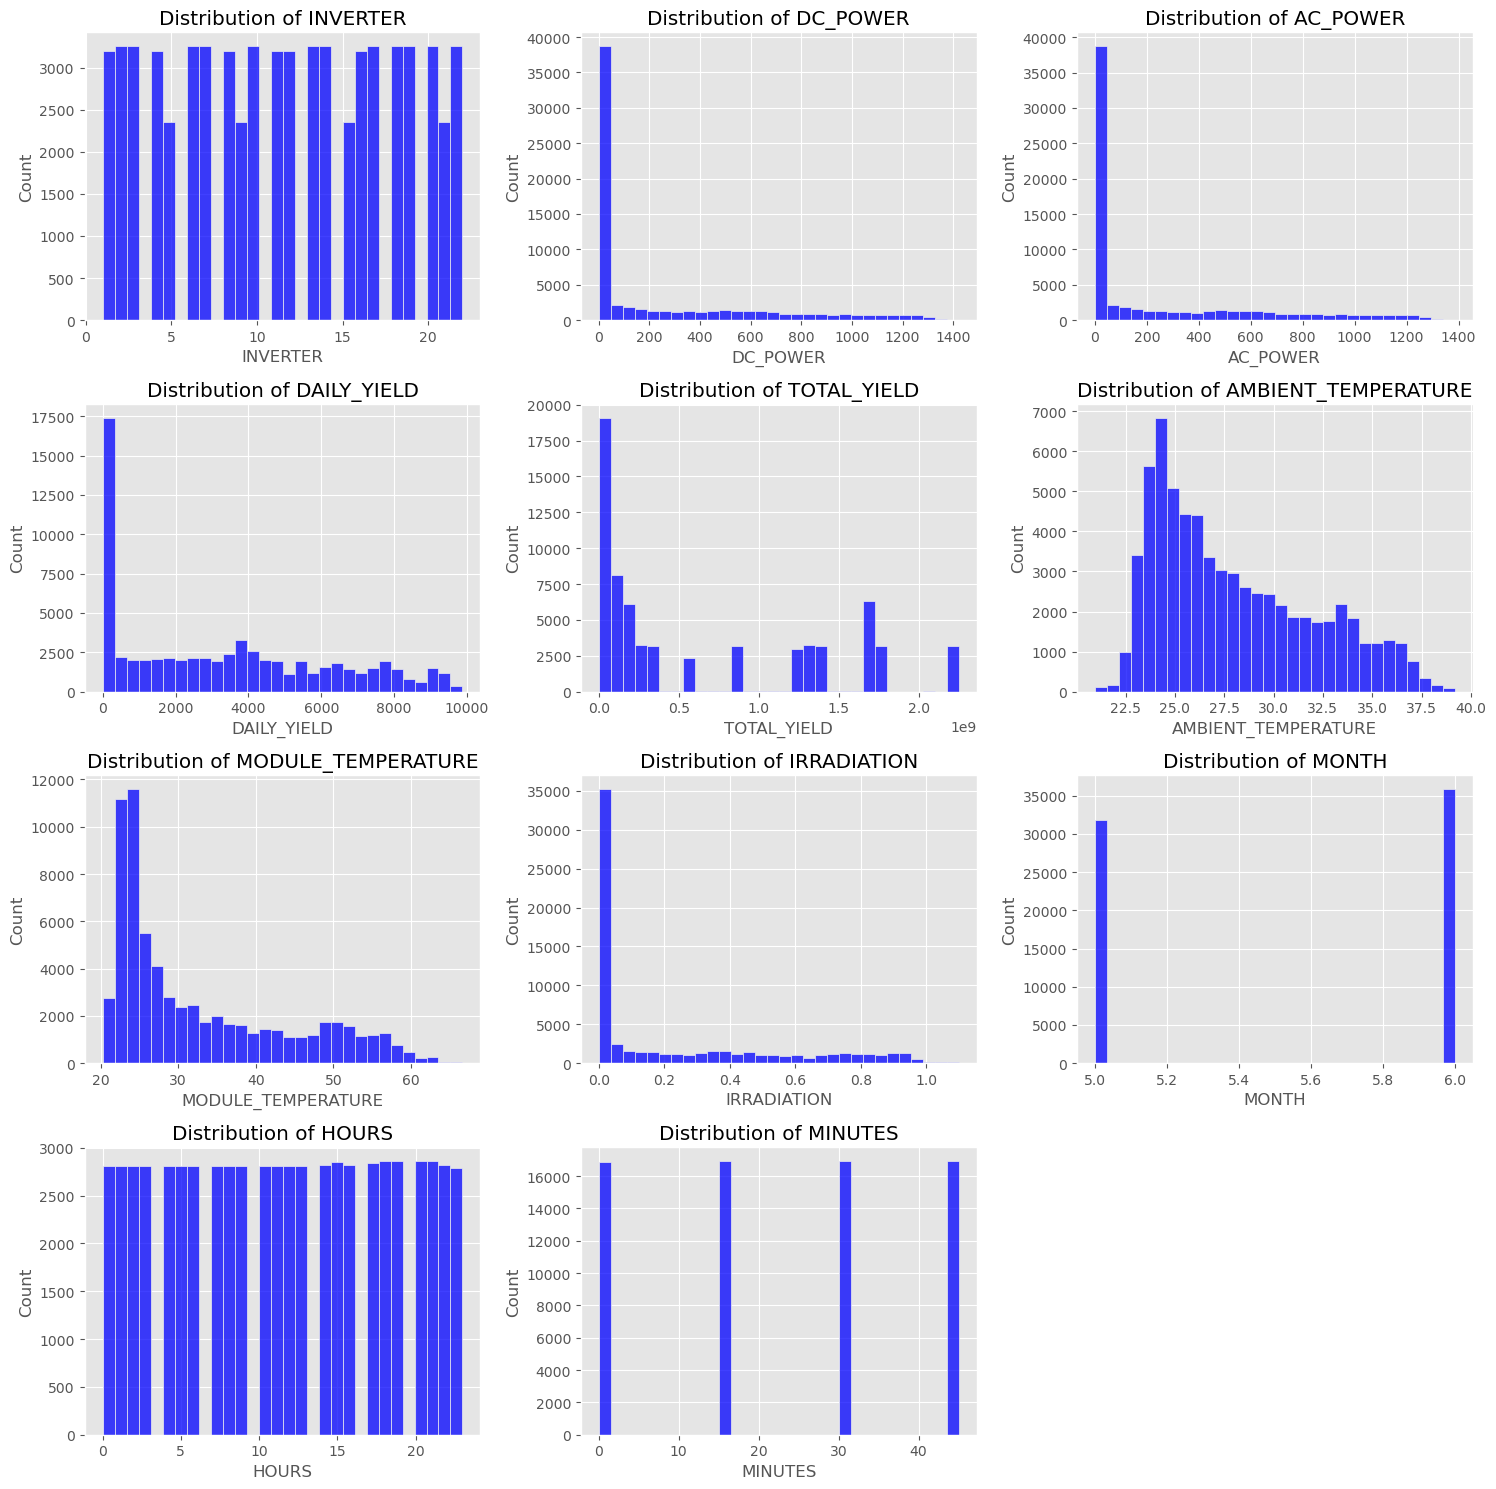

In [32]:
# List of numerical columns
numerical_columns = ['INVERTER', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD', 
                     'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'MONTH', 
                     'HOURS', 'MINUTES']

# Plot histograms for numerical columns
plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_columns):
    plt.subplot(4, 3, i + 1)
    sns.histplot(merged_df[col], bins= 30, alpha=0.75, color='blue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

* The INVERTER variable appears to be uniformly distributed, with counts spread evenly across different inverters.
* DC_POWER and AC_POWER variables are highly skewed to the right, with most values concentrated near zero.
* The DAILY_YIELD variable shows a right-skewed distribution with a gradual decrease in frequency. 
* The TOTAL_YIELD variable is also right-skewed, with noticeable peaks at specific intervals.
* The AMBIENT_TEMPERATURE variable shows a normal distribution with a peak around 27.5°C.
* The MODULE_TEMPERATURE variable is right-skewed, with a majority of the values falling between 20°C and 40°C.
* The IRRADIATION variable is highly skewed to the right, with most values near zero.
* The MONTH variable shows data collected over two months (May and June).
* The HOURS variable shows data collected throughout the day, with an even distribution across different hours.
* The MINUTES variable shows data collected at 15-minute intervals.

To obtain a clearer view of the distribution for features like DC_POWER, AC_POWER, and IRRADIATION, zero values that represent measurements dependent on sunlight can be filtered out. This approach is sensible because zero values likely correspond to nighttime or other periods without sunlight, which can skew the distribution analysis.

In [33]:
# Filter out rows with zero values in DC_POWER, AC_POWER, and IRRADIATION
filtered_df = merged_df[(merged_df['DC_POWER'] > 0) & (merged_df['AC_POWER'] > 0) & (merged_df['IRRADIATION'] > 0)]
filtered_df.head()

DATE_TIME  INVERTER   DC_POWER   AC_POWER  DAILY_YIELD  \
528 2020-05-15 06:00:00         1  15.406667  14.860000     0.800000   
529 2020-05-15 06:00:00         2  14.773333  14.246667     0.733333   
530 2020-05-15 06:00:00         3  15.380000  14.840000     1.866667   
531 2020-05-15 06:00:00         4  14.973333  14.440000     1.000000   
532 2020-05-15 06:00:00         5  15.160000  14.633333     0.733333   

      TOTAL_YIELD  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  \
528  2.429012e+06            24.742787            24.07723     0.012962   
529  1.215279e+09            24.742787            24.07723     0.012962   
530  2.247720e+09            24.742787            24.07723     0.012962   
531  1.704251e+06            24.742787            24.07723     0.012962   
532  1.994153e+07            24.742787            24.07723     0.012962   

           DATE      TIME  DAY  MONTH  WEEK  HOURS  MINUTES  
528  2020-05-15  06:00:00   15      5    20      6        0  
529  2020-05-15  06:00:00   15      5    20      6        0  
530  2020-05-15  06:00:00   15      5    20      6        0  
531  2020-05-15  06:00:00   15      5    20      6        0  
532  2020-05-15  06:00:00   15      5    20      6        0

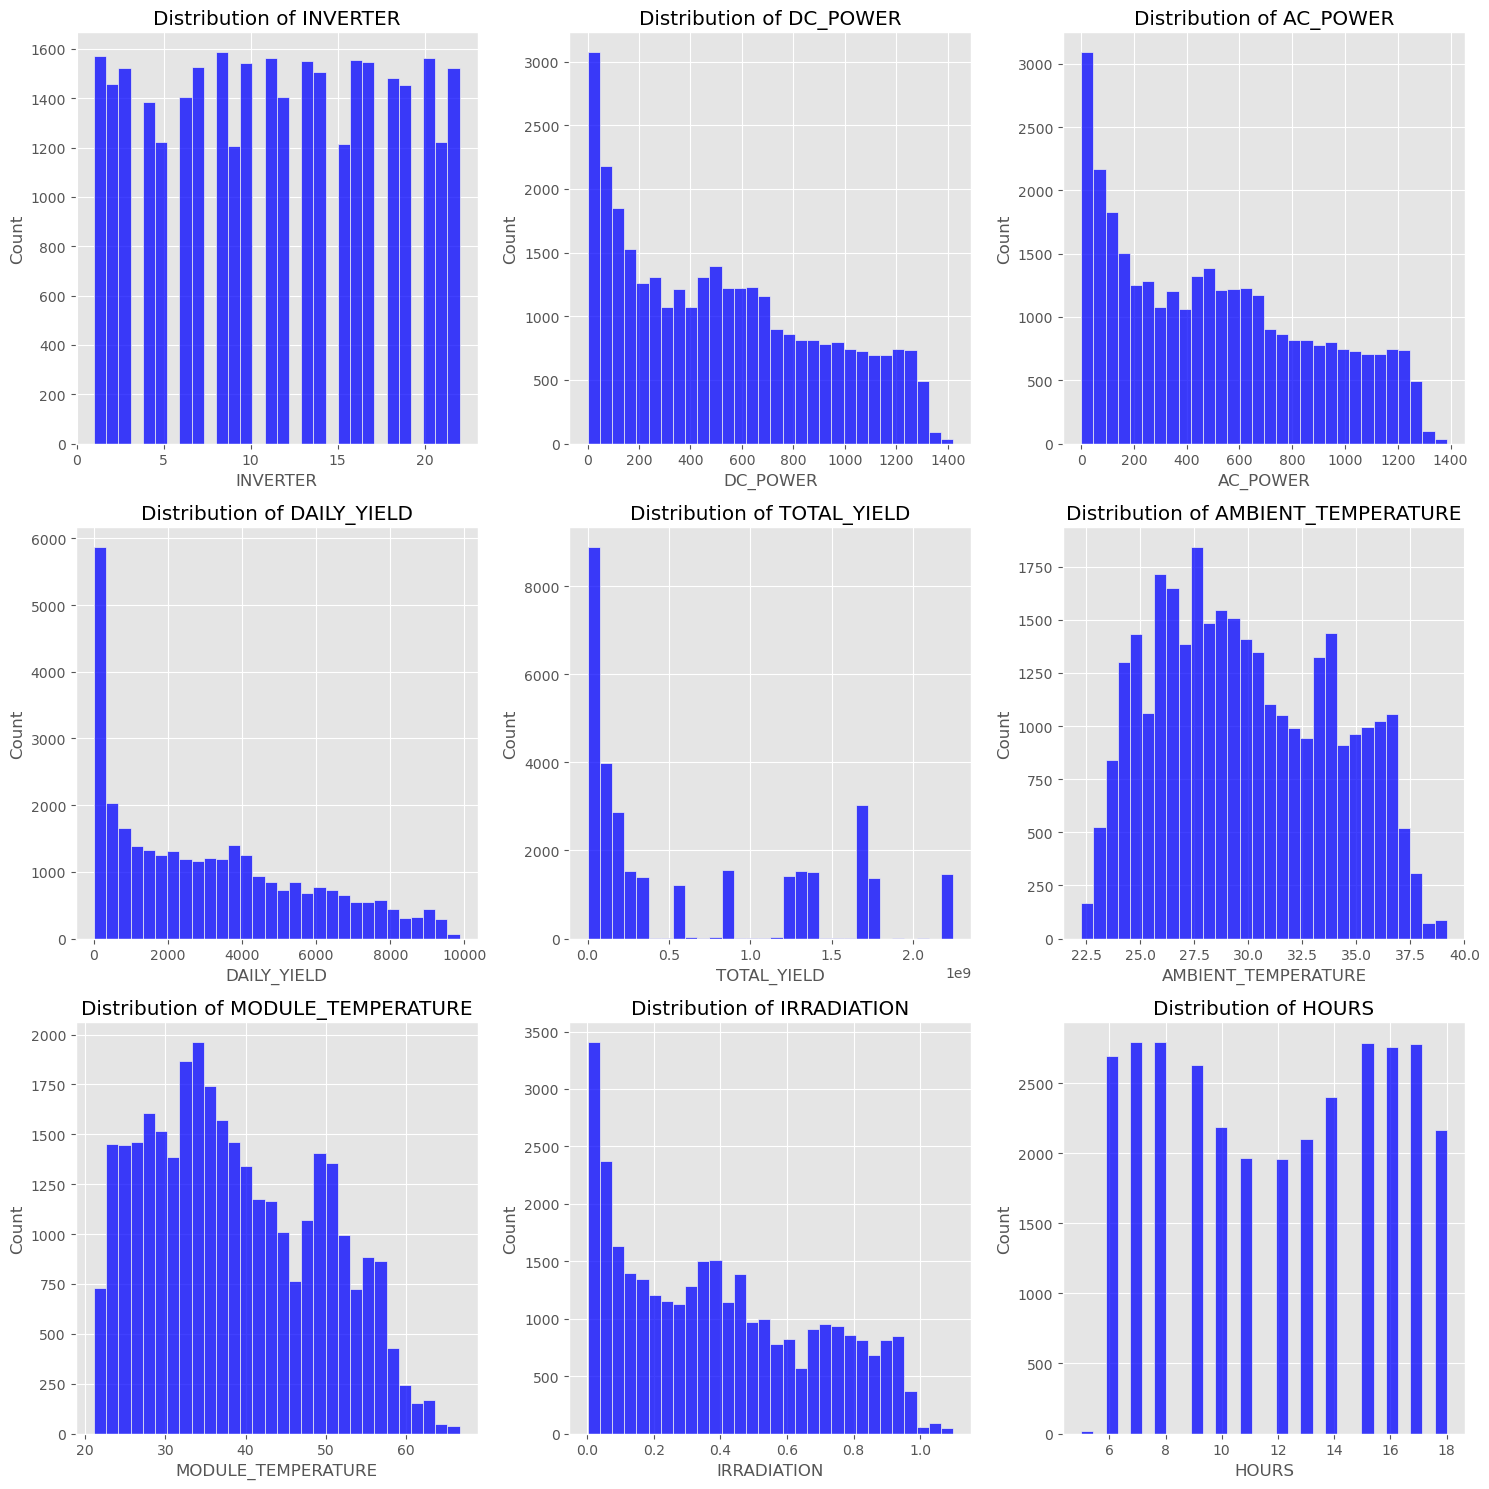

In [34]:
# List of numerical columns after filtering out zero values
filtered_numerical_columns = ['INVERTER', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD', 
                              'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION','HOURS']


# Plot histograms for numerical columns
plt.figure(figsize=(15, 15))
for i, col in enumerate(filtered_numerical_columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(filtered_df[col], bins=30, alpha=0.75, color='blue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

* DC_POWER and AC_POWER are still right-skewed but better distributed without zeros.
* DAILY_YIELD is right-skewed, showing a more continuous range of values.
* The TOTAL_YIELD is right-skewed with noticeable peaks.
* AMBIENT_TEMPERATURE is approximately normal distribution centered around 27.5°C.
* MODULE_TEMPERATURE is right-skewed with most values between 20°C and 40°C.
* IRRADIATION is right-skewed, with most values between 0 and 1.
* The data is fairly uniformly distributed across different hours, indicating balanced data collection throughout the day.

### 2.7.2  Smooth Distribution of the Data

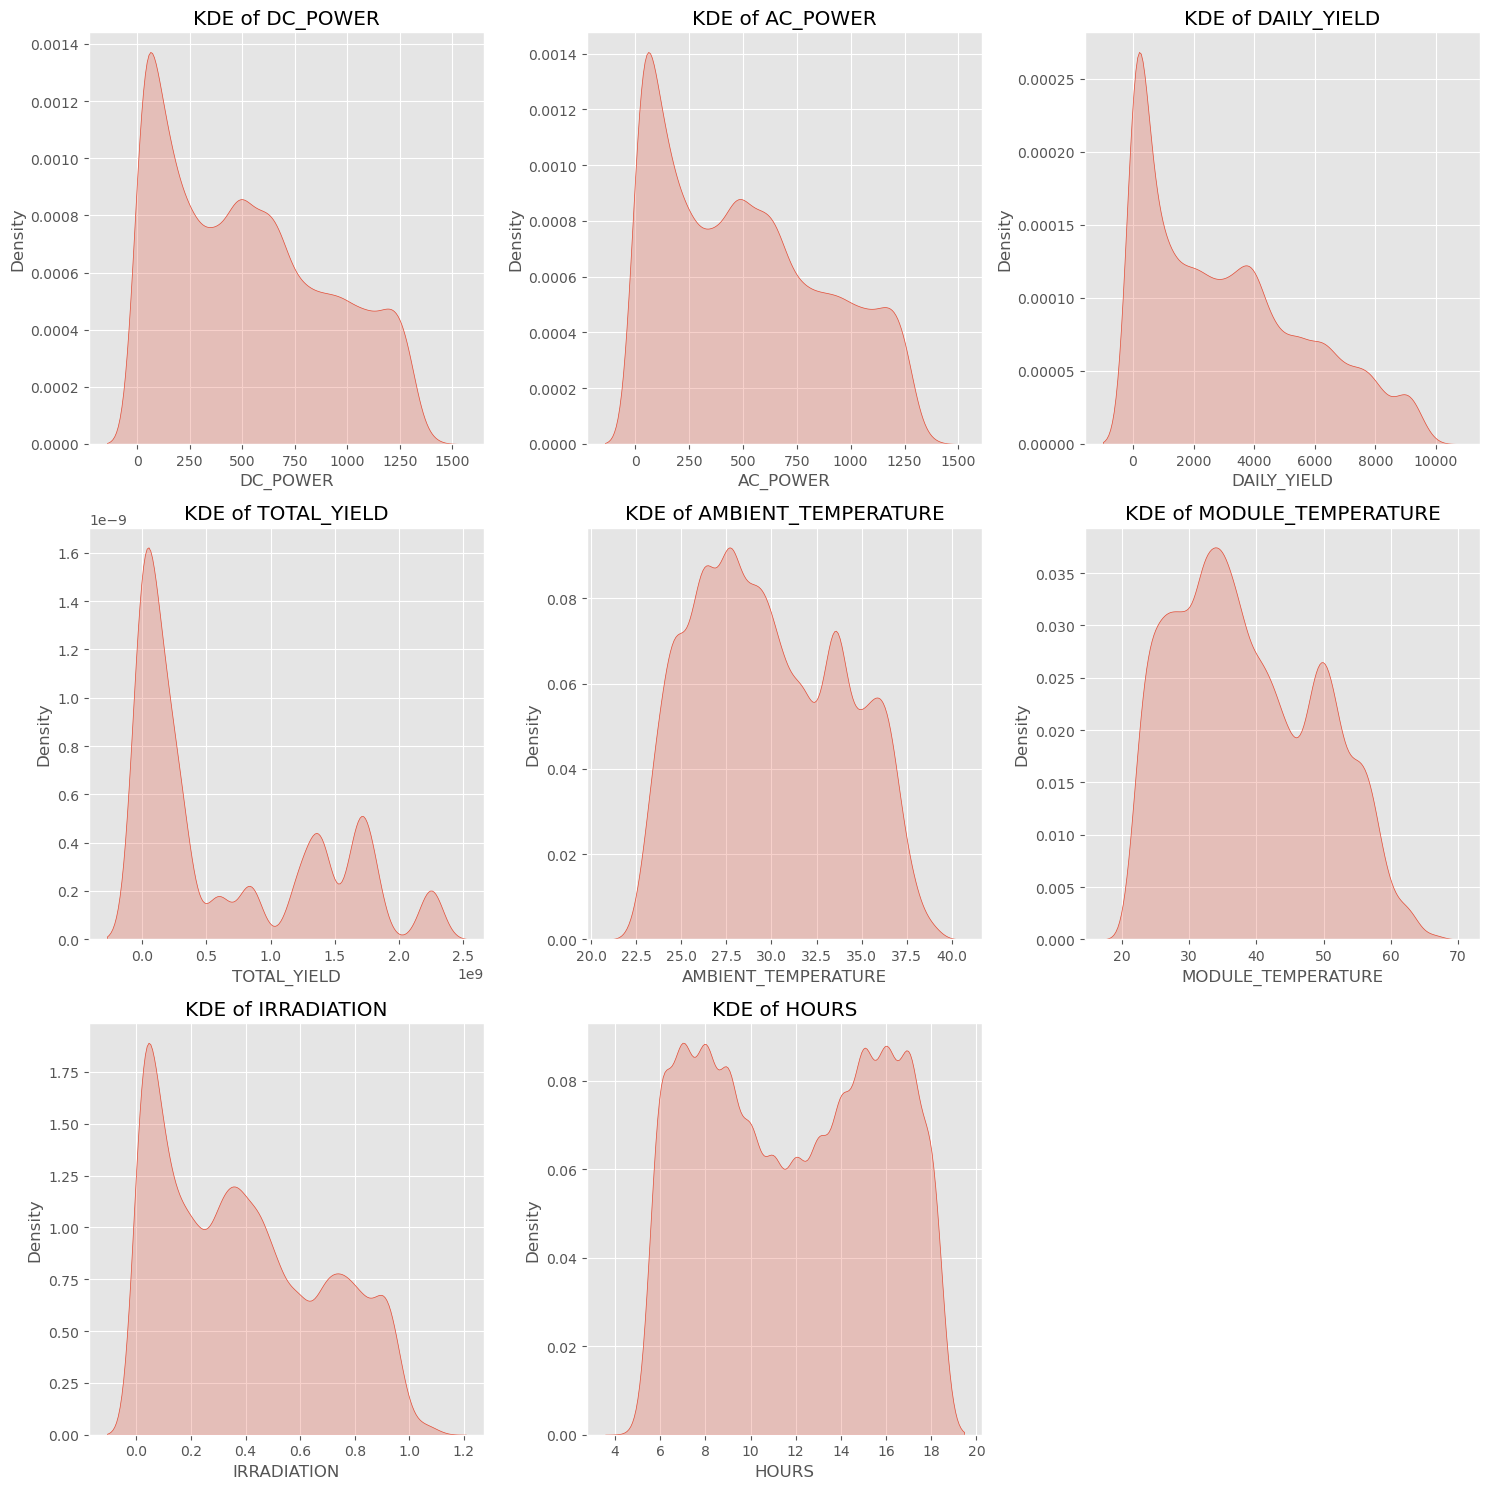

In [35]:
# List of numerical columns (after filtering out zero values)
filtered_numerical_columns = ['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD', 
                              'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION','HOURS'] 

# Plots KDE for Filtered Data
plt.figure(figsize=(15, 15))
for i, col in enumerate(filtered_numerical_columns):
    plt.subplot(3, 3, i + 1)
    sns.kdeplot(filtered_df[col], fill=True)
    plt.title(f'KDE of {col}')
plt.tight_layout()
plt.show()

KDE plots provide a smooth estimate of the distributions and confirm the observations from the histograms.

### 2.7.3 Identify the Spread and Detect any Outliers 

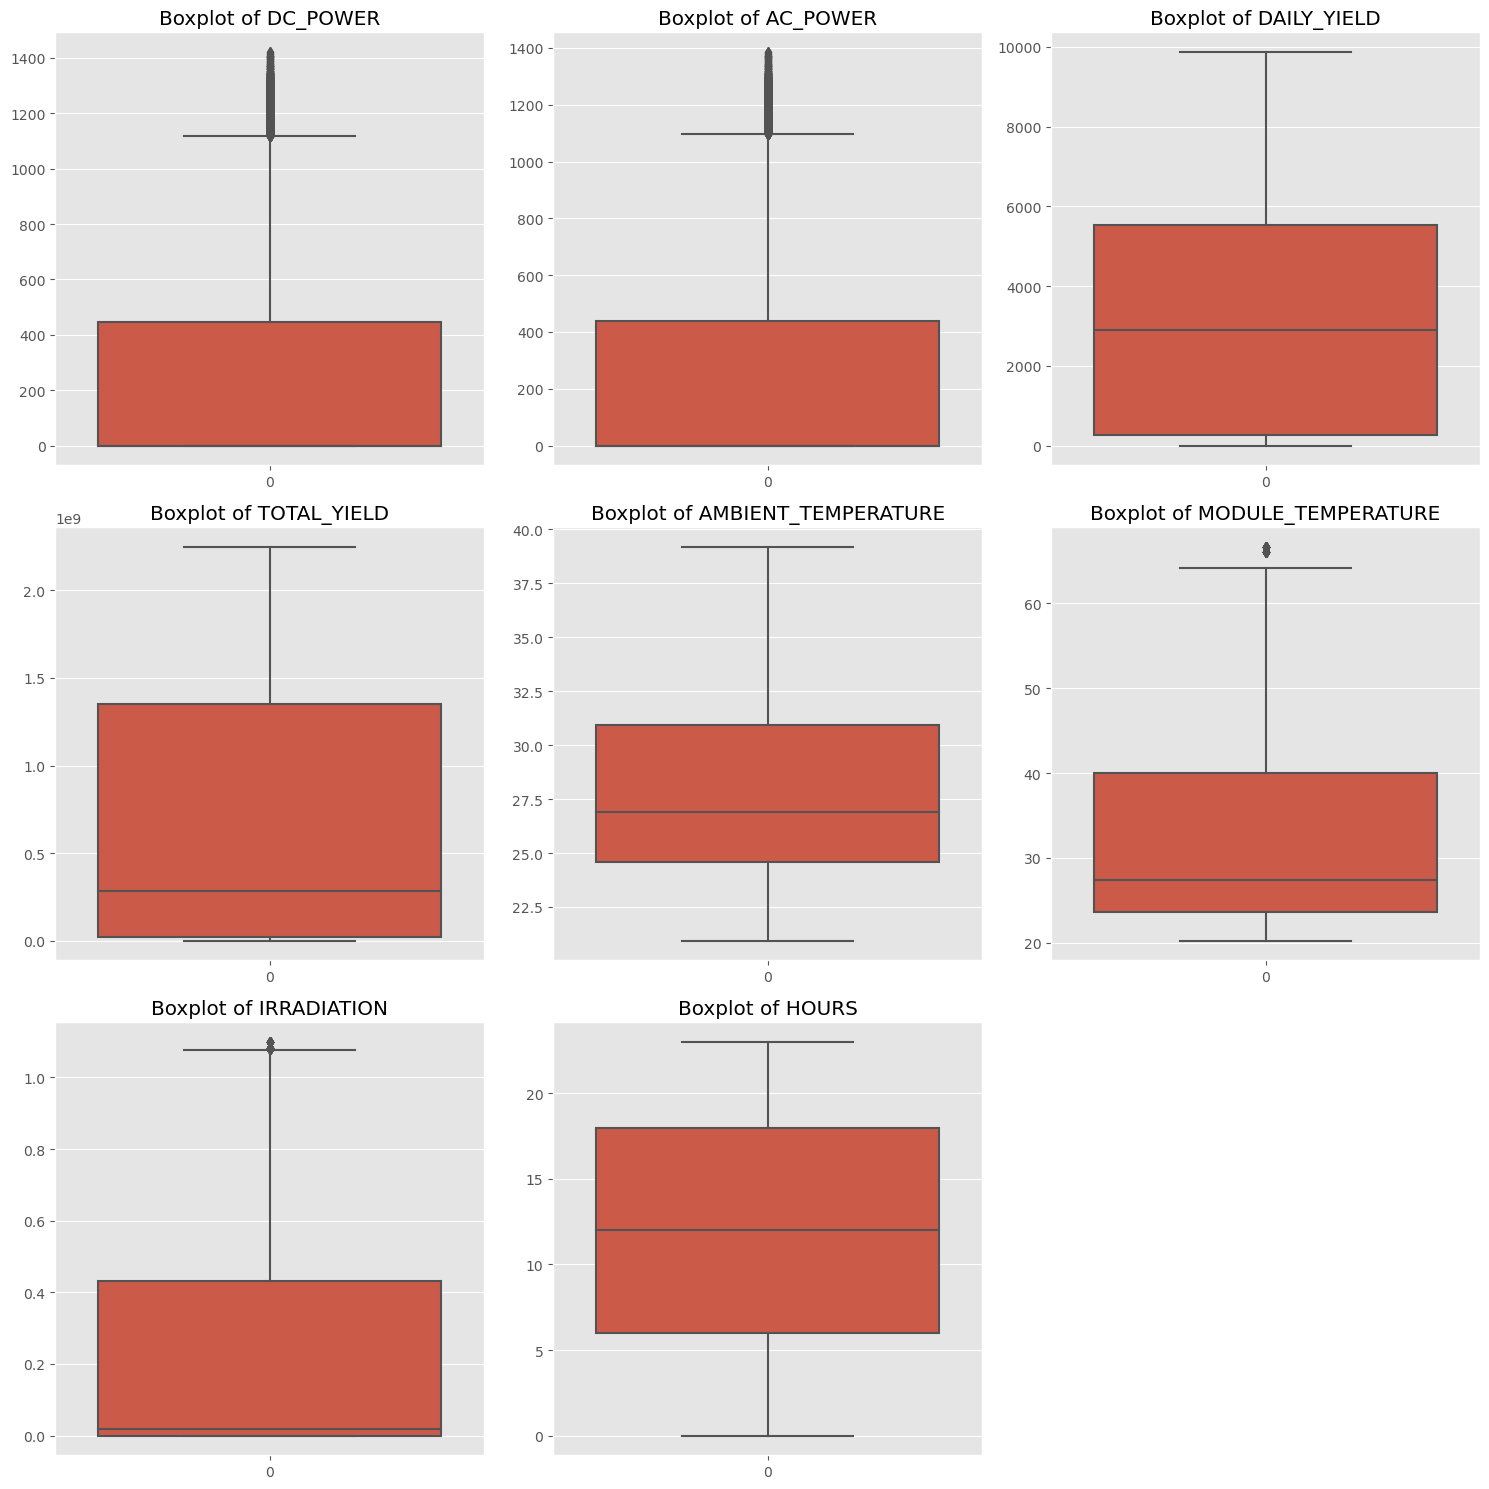

In [36]:
# Plot boxplots
plt.figure(figsize=(15, 15))
for i, col in enumerate(filtered_numerical_columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(merged_df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

* DC_POWER and AC_POWER have several outliers at higher power values, indicating occasional spikes in power generation.
* MODULE_TEMPERATURE and IRRADIATION have some outliers at higher values, suggesting occasional extreme temperature and irradiation conditions.

### 2.7.4 Relationships Between Numerical Features

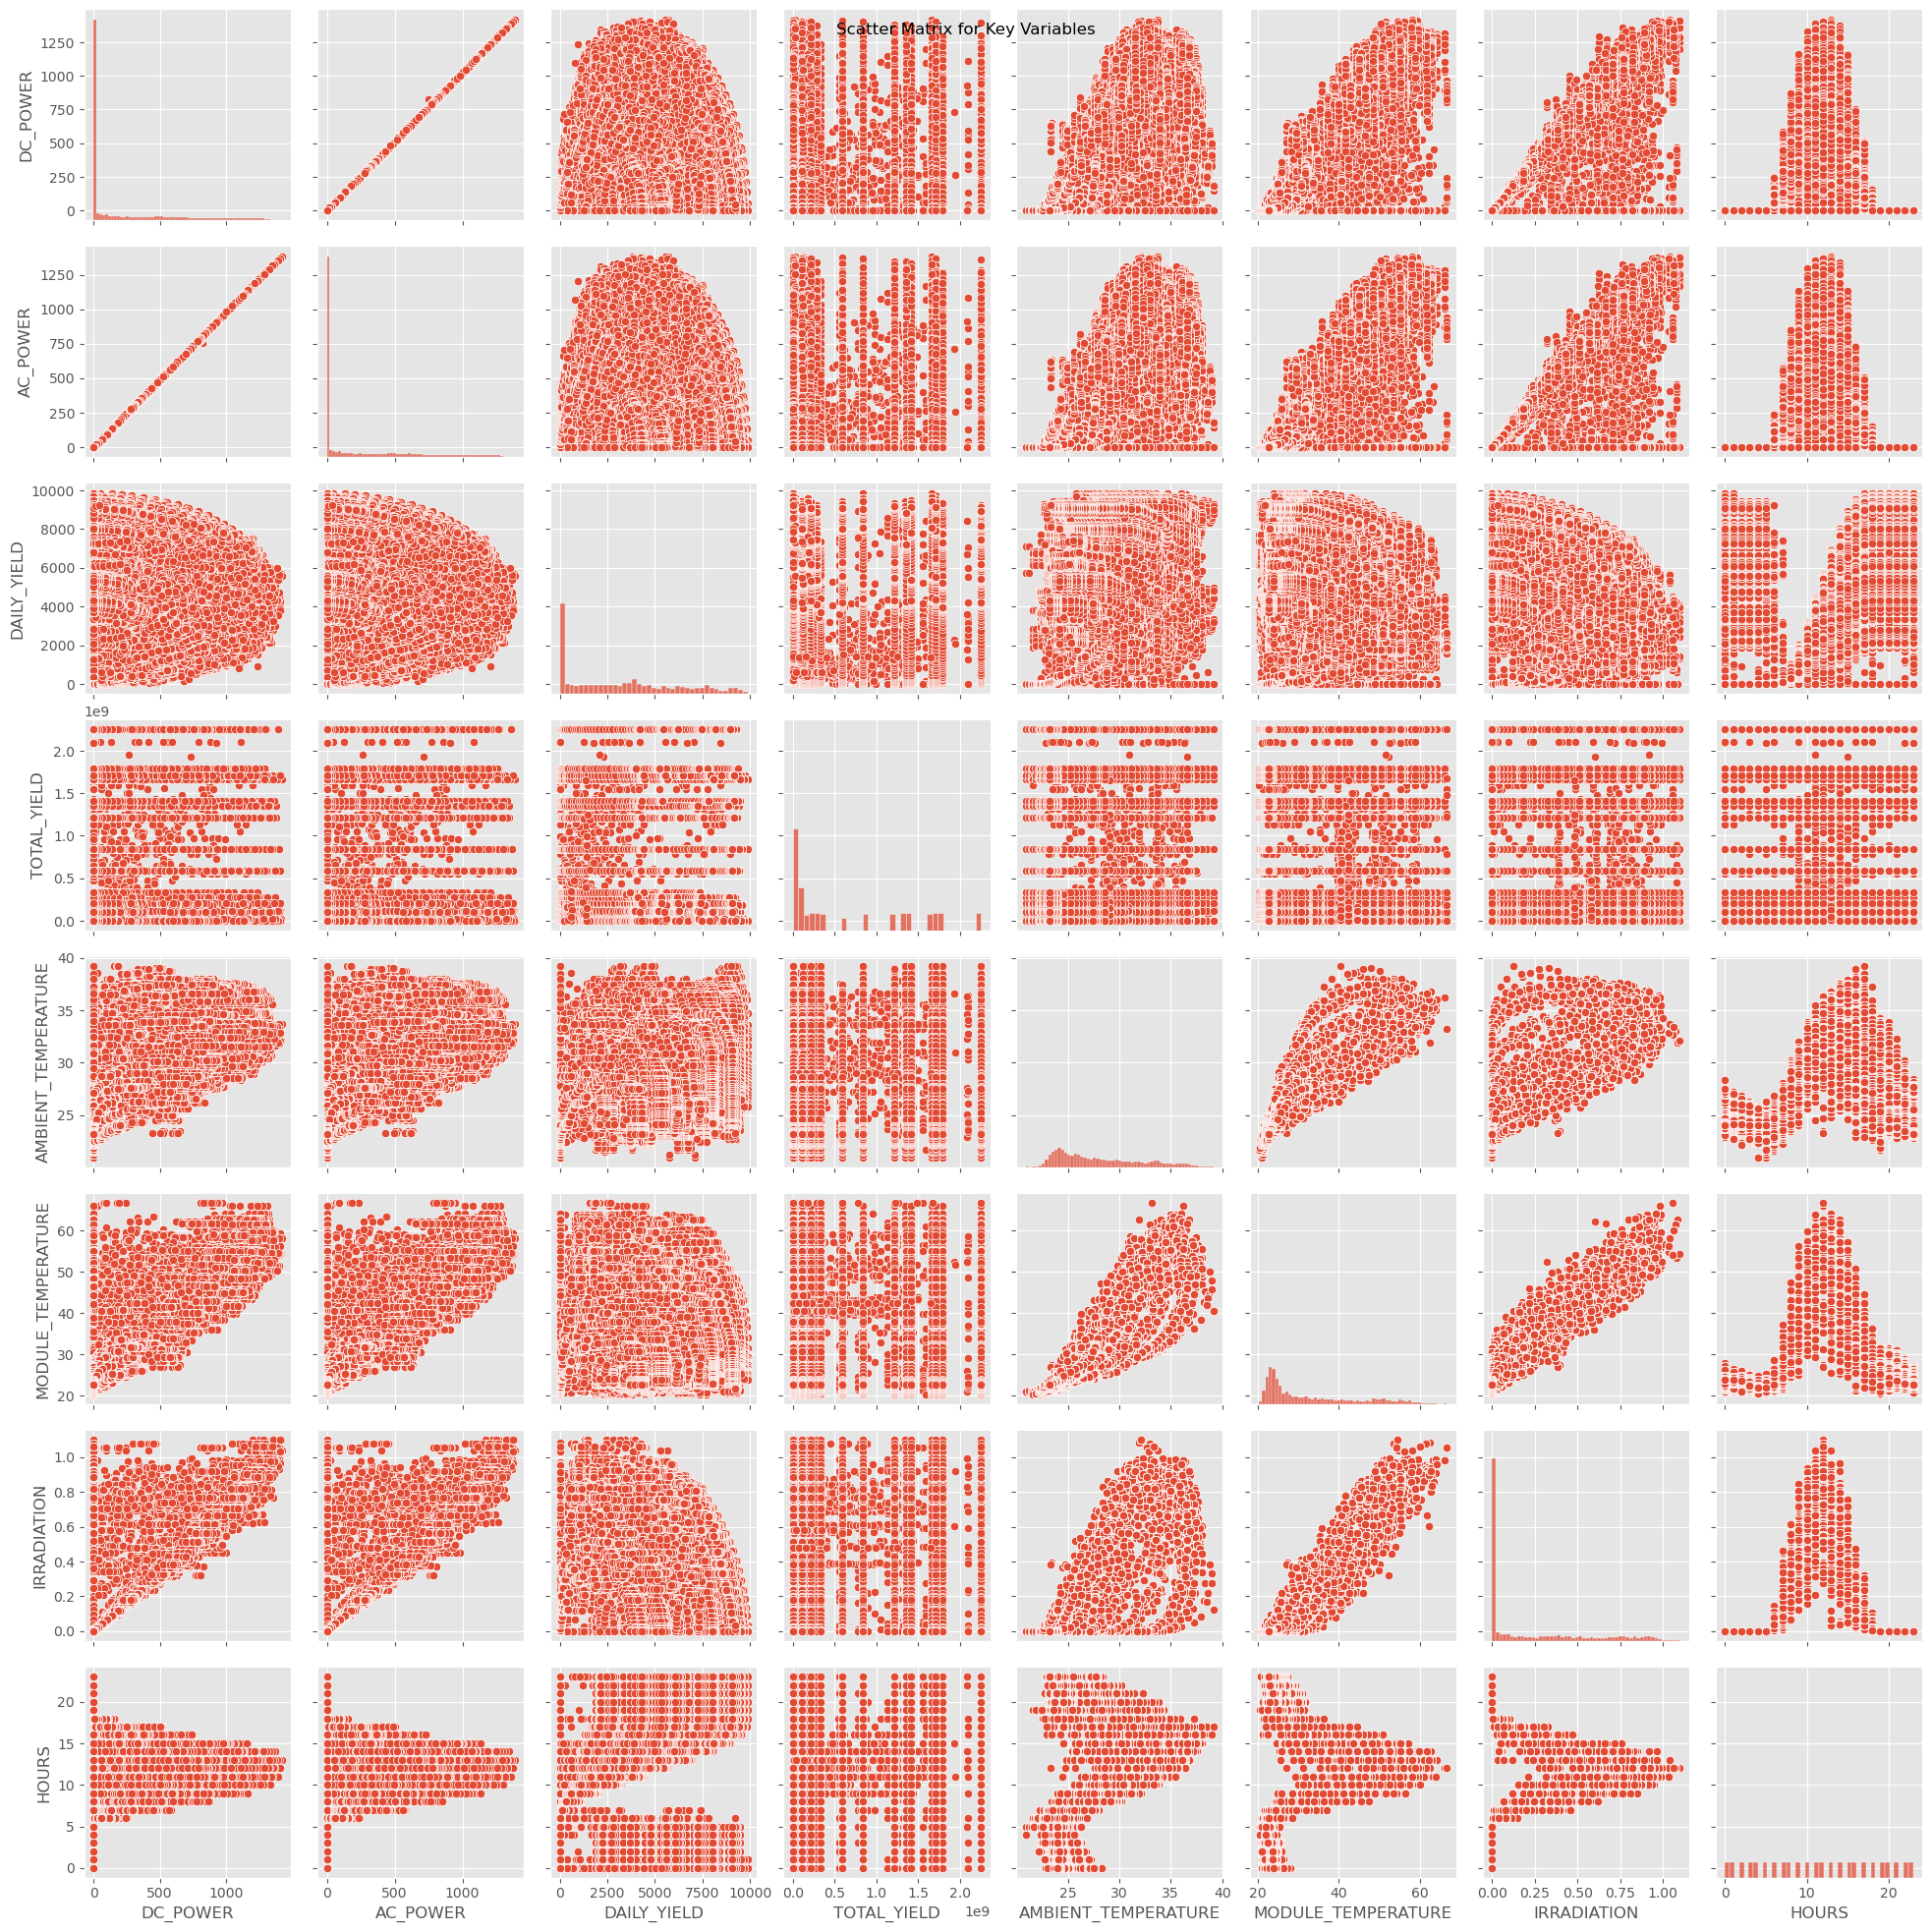

In [37]:
# Scatter plot matrix
sns.pairplot(merged_df[filtered_numerical_columns])
plt.suptitle('Scatter Matrix for Key Variables')
plt.show()

* There is a strong linear relationship between DC_POWER and AC_POWER, which is expected since they both measure power, just in different forms.
* DAILY_YIELD and TOTAL_YIELD also show a strong positive correlation. As daily yield increases, the total yield accumulates accordingly.
* There is a moderate positive correlation between AMBIENT_TEMPERATURE and MODULE_TEMPERATURE, indicating that as ambient temperature increases, module temperature also tends to rise.
* IRRADIATION shows a positive correlation with both DC_POWER and AC_POWER. Higher solar irradiance leads to higher power generation.
*  The HOURS feature shows a cyclic pattern in its relationships with power and temperature features, reflecting the daily cycle of solar radiation and temperature changes.

### 2.7.5 Correlations Between Numerical Features

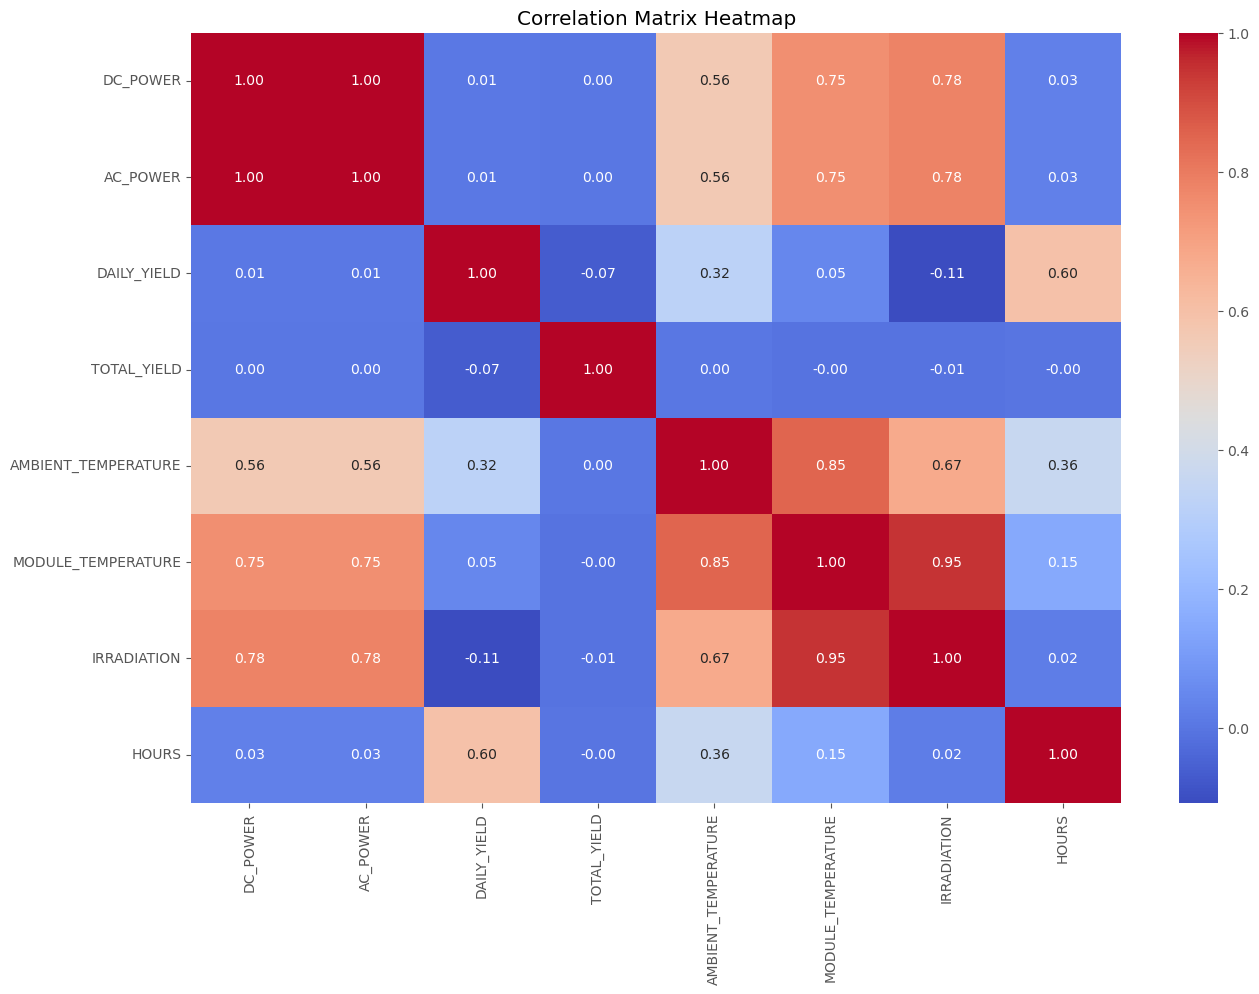

In [38]:
plt.figure(figsize=(15, 10))
sns.heatmap(merged_df[filtered_numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

* There is a perfect correlation (1.00) between DC_POWER and AC_POWER.
* There is a moderate correlation (0.75) between DC_POWER and MODULE_TEMPERATURE, indicating that as module temperature increases, power generation also tends to increase.
* There is a high correlation (0.78) between DC_POWER and IRRADIATION, showing that higher solar irradiance results in higher power generation.
* There is a strong correlation (0.85)between AMBIENT_TEMPERATURE and MODULE_TEMPERATURE, suggesting that higher ambient temperatures are associated with higher module temperatures.
* There is a moderate correlation (0.67) between AMBIENT_TEMPERATURE and IRRADIATION, suggesting that higher ambient temperatures are associated with higher solar irradiance.
* There is a high correlation (0.95) between MODULE_TEMPERATURE and IRRADIATION, indicating that higher irradiation leads to higher module temperatures.
* There is a moderate correlation (0.60) between HOURS and DAILY_YIELD, reflecting the daily cycle of solar radiation and power generation.

### 2.7.6 Focusing on Features with Strong Correlations 

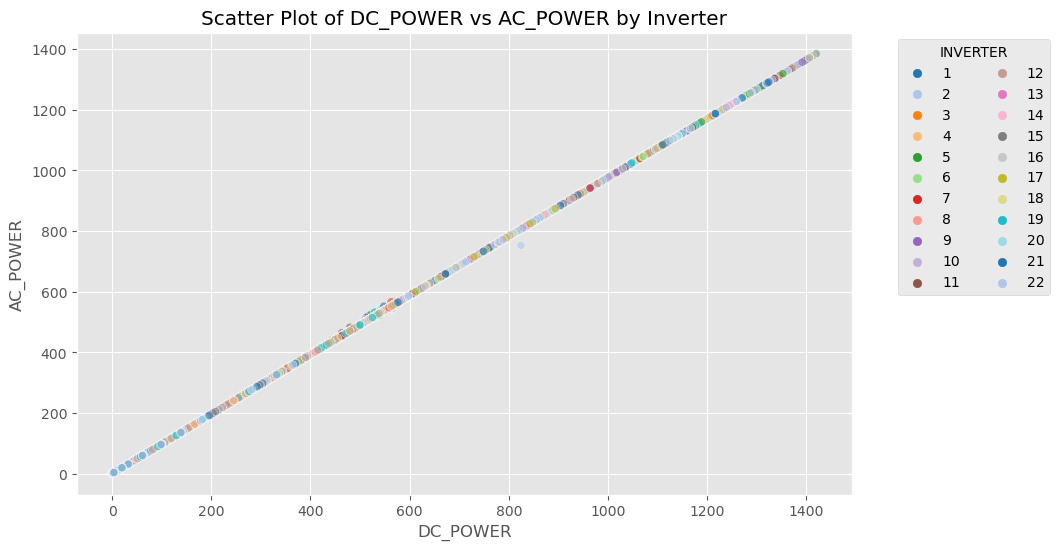

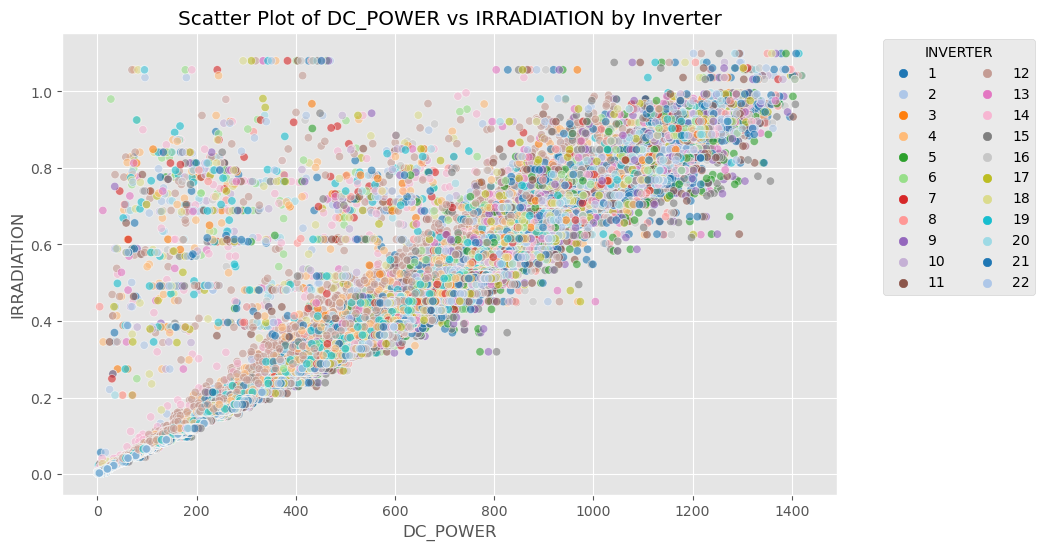

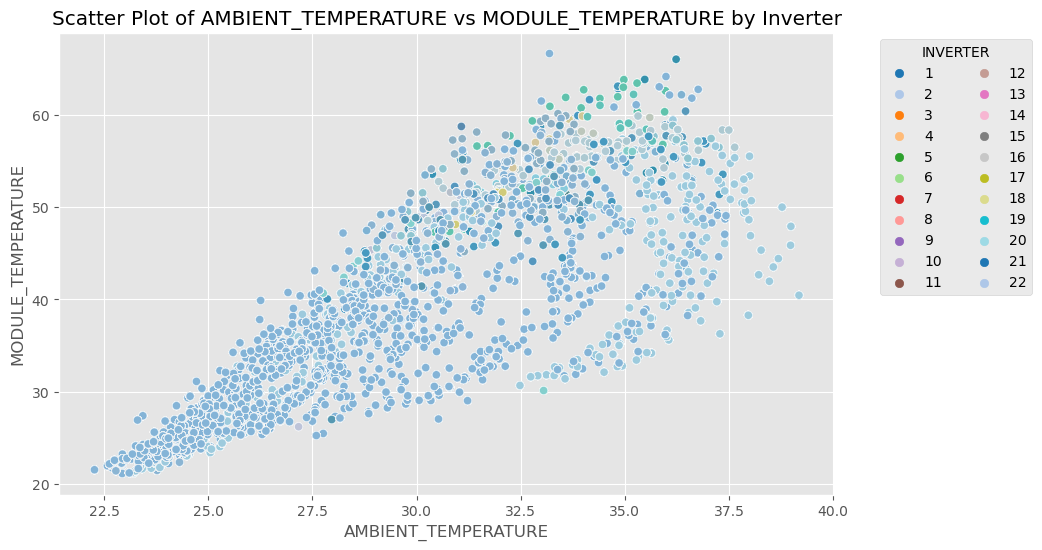

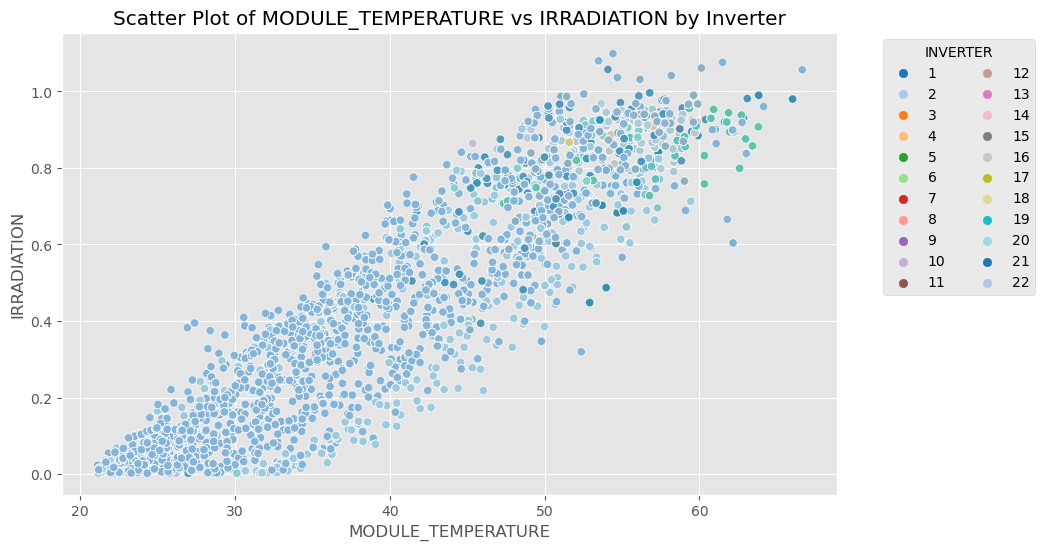

In [39]:
# Create a list of strongly correlated pairs
strong_pairs = [
    ('DC_POWER', 'AC_POWER'),
    ('DC_POWER', 'IRRADIATION'),
    ('AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE'),
    ('MODULE_TEMPERATURE', 'IRRADIATION')
]

# Plot each pair
for x, y in strong_pairs:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=filtered_df, x=x, y=y, hue='INVERTER', palette='tab20', alpha=0.6)
    plt.title(f'Scatter Plot of {x} vs {y} by Inverter')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='INVERTER', ncol=2)
    plt.show()

* There's a strong linear relationship between DC power and AC power, which is expected since AC power is derived from DC power.Data from different inverters align closely along the same line, indicating consistent conversion efficiency.

* A positive correlation is observed between DC_POWER vs IRRADIATION. Higher irradiation leads to higher DC power generation. Some variations among different inverters could be due to differences in efficiency or operational conditions.

* A strong positive correlation is seen between AMBIENT_TEMPERATURE vs MODULE_TEMPERATURE. Higher ambient temperatures lead to higher module temperatures. The spread among different inverters is consistent.

* A positive correlation is observed between MODULE_TEMPERATURE vs IRRADIATION. Higher irradiation leads to higher module temperatures.Some spread among different inverters may indicate variations in how different inverters or their panels handle heat.

### 2.7.7 Visualize the Changes in Features over the Time

A detailed temporal analysis is conducted to understand how the variables of interest vary across different times and potentially uncover patterns that could be useful for predictive modeling.

#### 2.7.7.1 Time Trends in AC_POWER

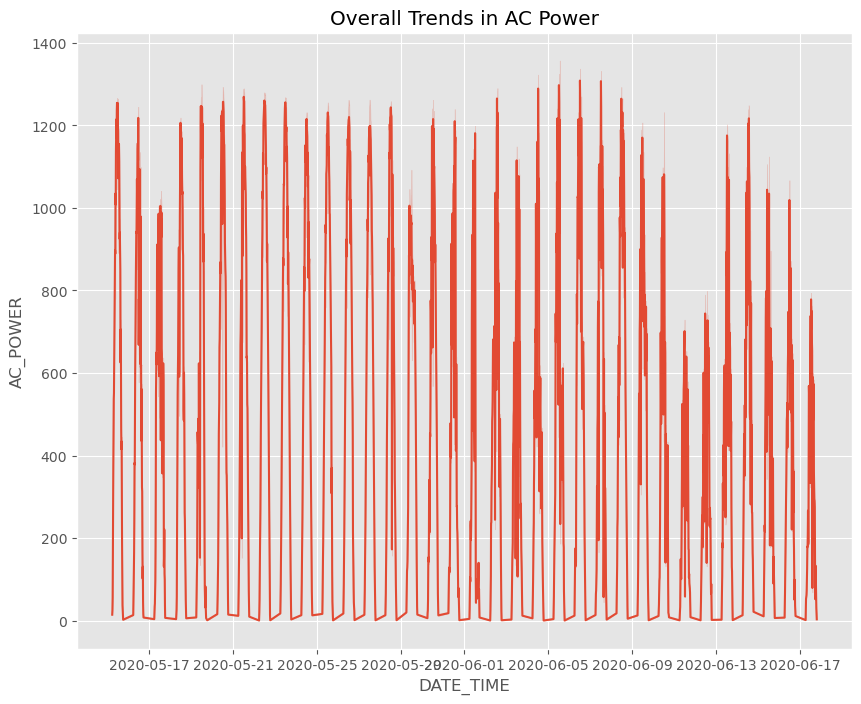

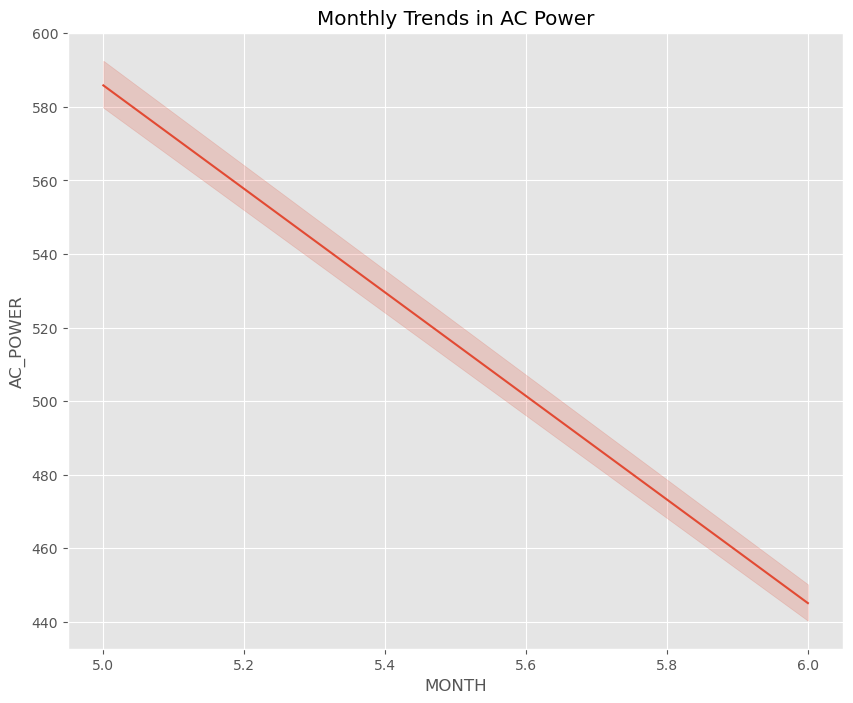

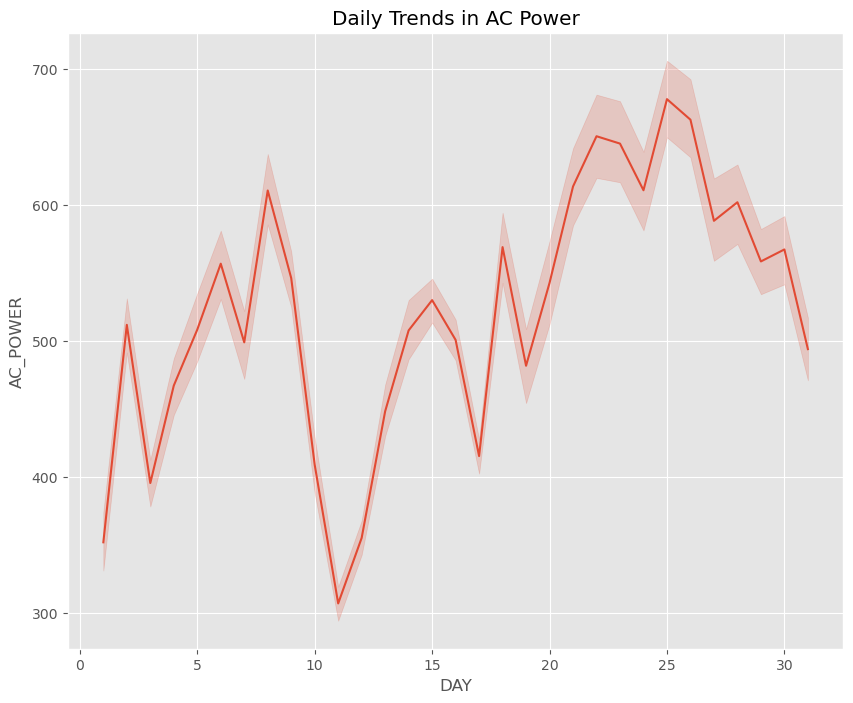

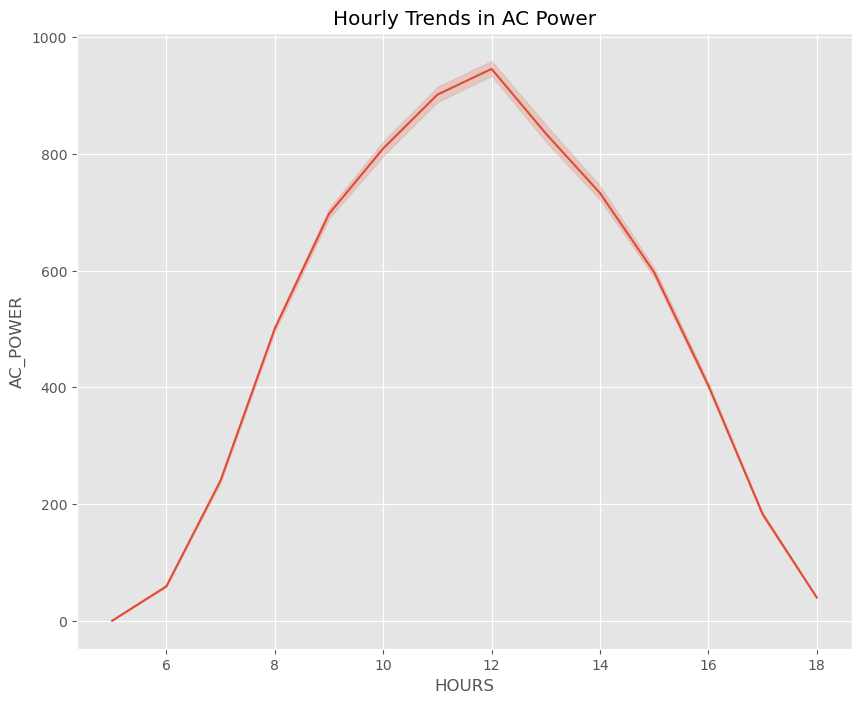

In [40]:
# Define the time trends of AC_POWER
time_trends = [
    ('DATE_TIME', 'AC_POWER', 'Overall Trends in AC Power'),
    ('MONTH', 'AC_POWER', 'Monthly Trends in AC Power'),
    ('DAY', 'AC_POWER', 'Daily Trends in AC Power'),
    ('HOURS', 'AC_POWER', 'Hourly Trends in AC Power')
]

# Plot each pair
for x, y, title in time_trends:
    plt.figure(figsize=(10, 8))
    sns.lineplot(data=filtered_df, x=x, y=y)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

* The daily cyclical pattern is evident, with AC_POWER peaking during the daytime and dropping to zero at night. This indicates solar power generation aligning with daylight hours. The trend also shows a slight overall decrease, potentially due to seasonal changes.
* There is a clear decreasing trend in AC_POWER over the months, potentially due to seasonal changes affecting the sun's position and daylight duration.
* While there is variability in daily AC_POWER, no clear repeating pattern emerges. This variability could be influenced by weather conditions such as cloudy days.
* AC_POWER follows a strong diurnal pattern, peaking around midday. This is typical for solar power generation, as power output rises after sunrise, peaks around noon, and decreases towards sunset.

#### 2.7.7.2 Time Trends in IRRADIATION

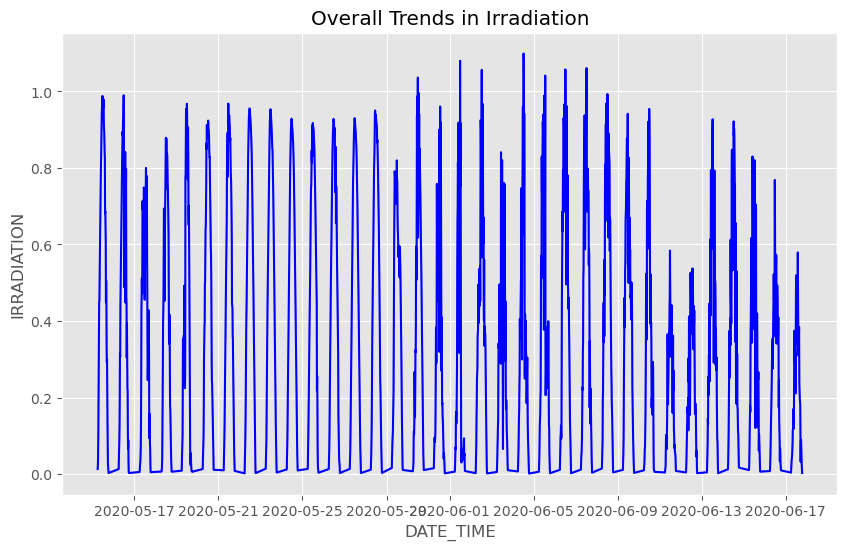

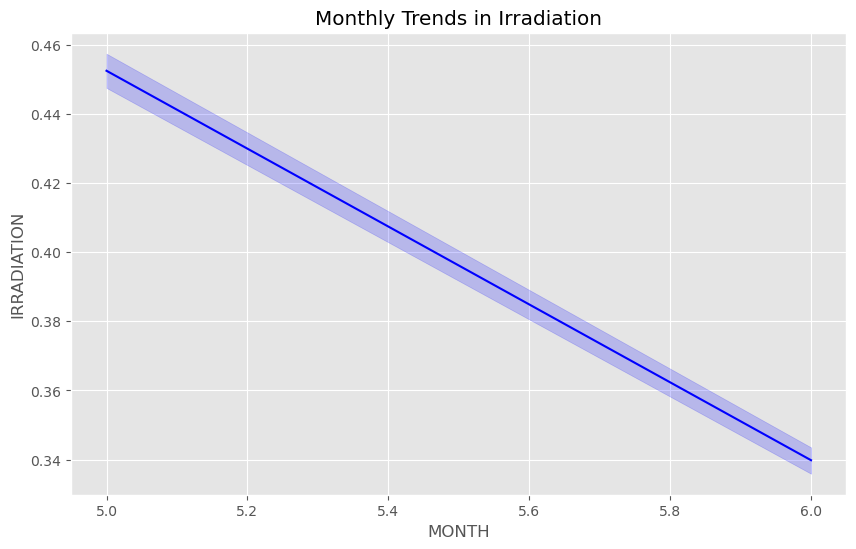

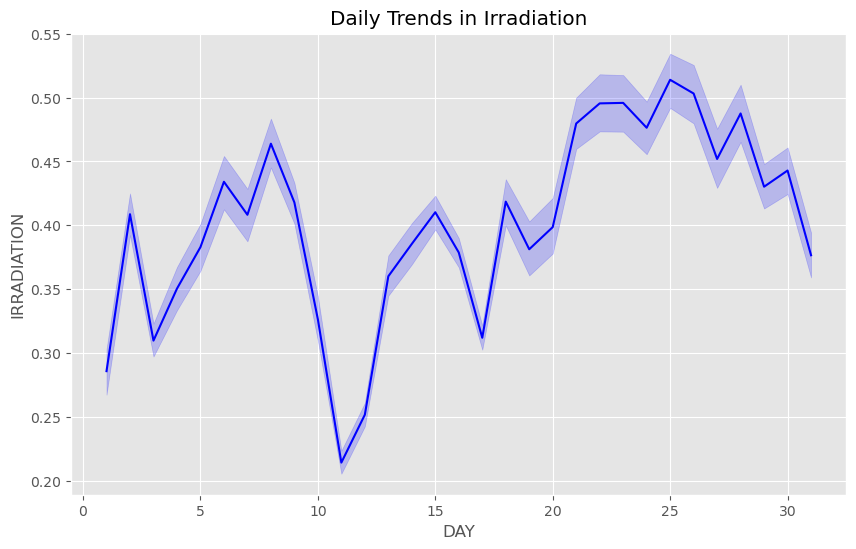

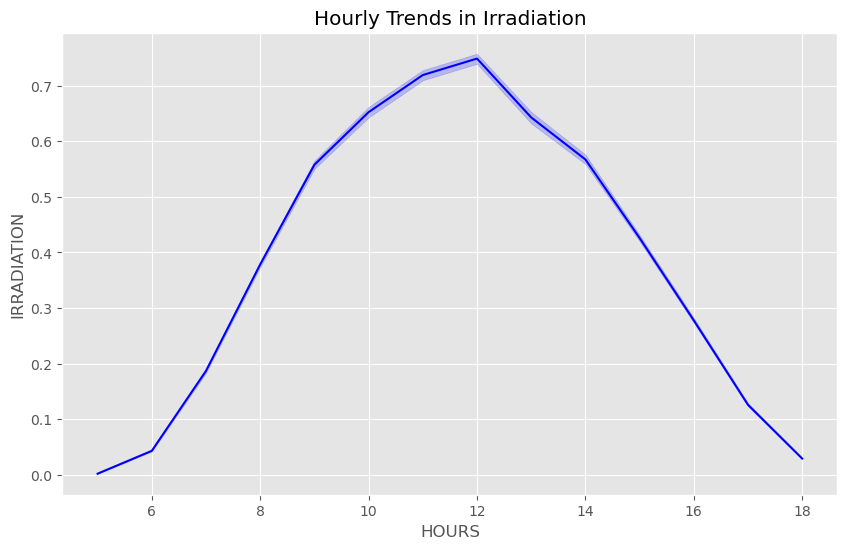

In [41]:
# Define the time trends of IRRADIATION
time_trends = [
    ('DATE_TIME', 'IRRADIATION', 'Overall Trends in Irradiation'),
    ('MONTH', 'IRRADIATION', 'Monthly Trends in Irradiation'),
    ('DAY', 'IRRADIATION', 'Daily Trends in Irradiation'),
    ('HOURS', 'IRRADIATION', 'Hourly Trends in Irradiation')
]

# Plot each pair
for x, y, title in time_trends:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=filtered_df, x=x, y=y, color='blue')
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

* Similar to AC_POWER, IRRADIATION shows a daily cyclical pattern, peaking during the day and dropping to zero at night. The trend also shows a slight overall decrease, consistent with changing sunlight conditions over the months.
* A decreasing trend is observed in IRRADIATION over the months, likely due to decreasing daylight hours and changes in the sun's position.
* Daily IRRADIATION values vary, but do not show a clear repeating pattern, likely due to weather variations.
* IRRADIATION follows a strong diurnal pattern, peaking around midday. This closely aligns with the trends observed in AC_POWER, as solar irradiation is a direct factor in solar power generation.

#### 2.7.7.3 Time Trends in MODULE_TEMPERATURE

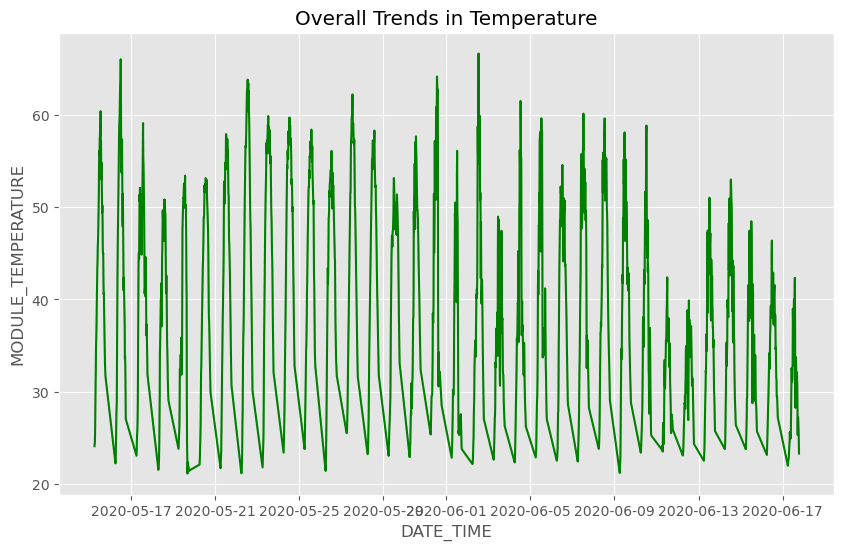

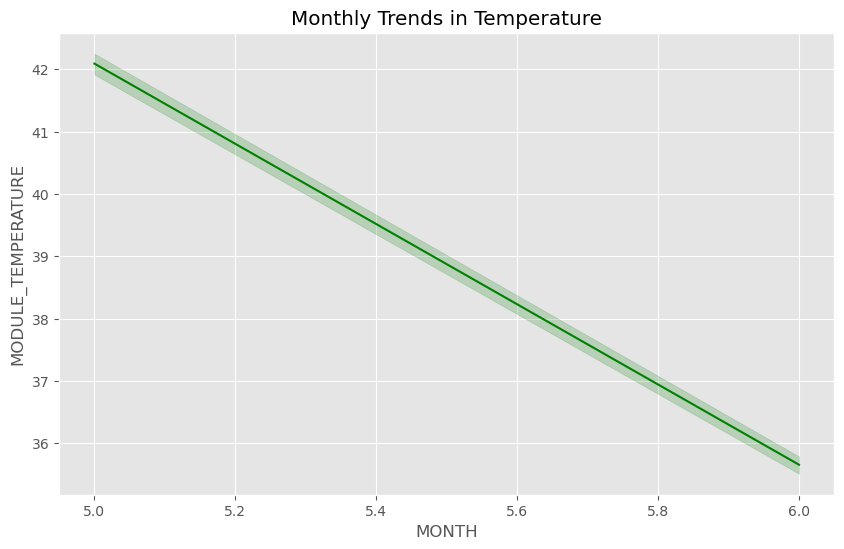

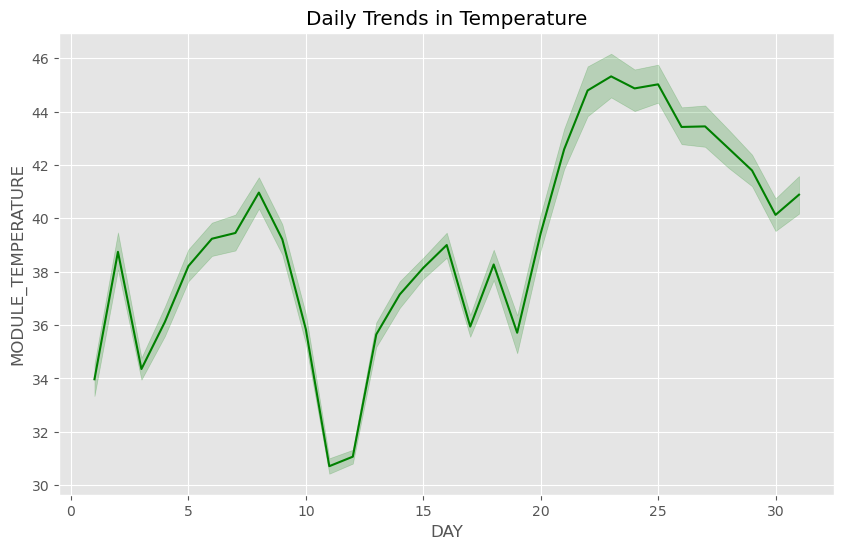

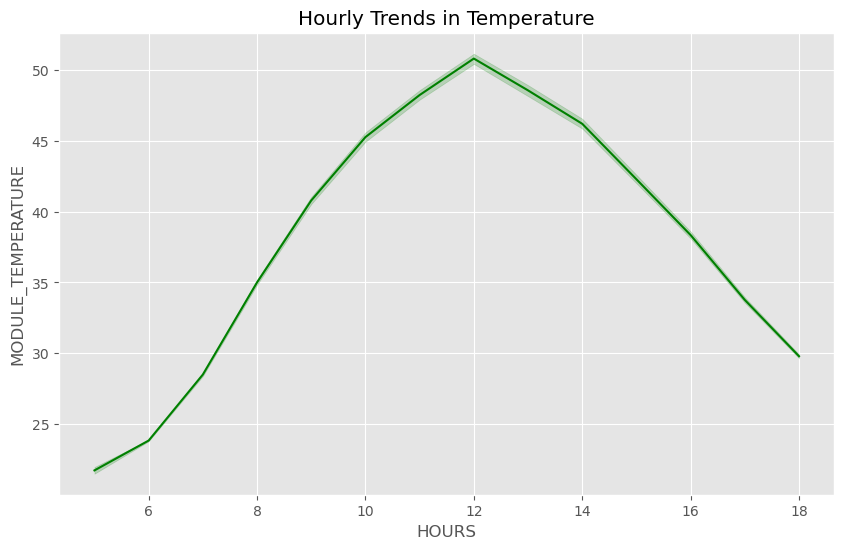

In [42]:
# Define the time trends of MODULE_TEMPERATURE
time_trends = [
    ('DATE_TIME', 'MODULE_TEMPERATURE', 'Overall Trends in Temperature'),
    ('MONTH', 'MODULE_TEMPERATURE', 'Monthly Trends in Temperature'),
    ('DAY', 'MODULE_TEMPERATURE', 'Daily Trends in Temperature'),
    ('HOURS', 'MODULE_TEMPERATURE', 'Hourly Trends in Temperature')
]

# Plot each pair
for x, y, title in time_trends:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=filtered_df, x=x, y=y, color='green')
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

* MODULE_TEMPERATURE shows daily fluctuations, with peaks during the day and lower values at night. The trend appears relatively stable with no significant long-term increase or decrease.
* A slight decreasing trend in MODULE_TEMPERATURE over the months is observed, which may be due to seasonal temperature changes.
* Daily MODULE_TEMPERATURE values show variability but do not follow a clear repeating pattern. This could be influenced by varying weather conditions.
* MODULE_TEMPERATURE shows a strong diurnal pattern, peaking around midday, which corresponds to the highest sunlight exposure. This pattern is similar to the trends in AC_POWER and IRRADIATION.

In [43]:
# Save the merged data
merged_df.to_csv('merged_data.csv', index=False)

# Save the filtered data
filtered_df.to_csv('filtered_data.csv', index=False)